In [17]:
!pip install -q shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 35.2 MB/s eta 0:00:00


In [18]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
import shap

In [2]:
# to import files from googledrive
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)
sample_size_dir = 'gdrive/My Drive/Sample size for NLP'

Mounted at /content/gdrive/


In [3]:
#diagnosis = '2724' # hyperlipidemia - 2724
diagnosis = '41401' # coronary atherosclerosis - 41401

In [4]:
df = pd.read_csv(sample_size_dir+'/data_jaya/'+diagnosis+'_combined_data_6000.csv')
#df = pd.read_csv(sample_size_dir+'/Sample_Size_Saniya/12k_data_for_classifier.csv')
df.head(2)

ROW_ID_x  SUBJECT_ID  HADM_ID  SEQ_NUM ICD9_CODE  ROW_ID_y   CHARTDATE  \
0    360799       31329   135605      4.0     76527     31187  2100-09-09   
1    219682       19673   155584      6.0     27650      3523  2195-06-01   

   CHARTTIME  STORETIME           CATEGORY DESCRIPTION  CGID  ISERROR  \
0        NaN        NaN  Discharge summary      Report   NaN      NaN   
1        NaN        NaN  Discharge summary      Report   NaN      NaN   

                                                TEXT  label  
0  Admission Date: [**2100-8-29**]        Dischar...      0  
1  Admission Date:  [**2195-5-27**]              ...      0

In [26]:
len(df)

1000

In [5]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['TEXT'])
y = df['label']

In [6]:
# using l1 lasso regularisation and liblinear solver to find optimal params for the model and is good with small datasets

model = LogisticRegression(penalty='l1', solver='liblinear')
model.fit(X, y)

LogisticRegression(penalty='l1', solver='liblinear')

In [7]:
# weights = coefficients of the features used in the model
# coeffs are learned during the training process and indicate the strength and direction of the relationship between each feature and the target variable

weights = model.coef_.flatten()

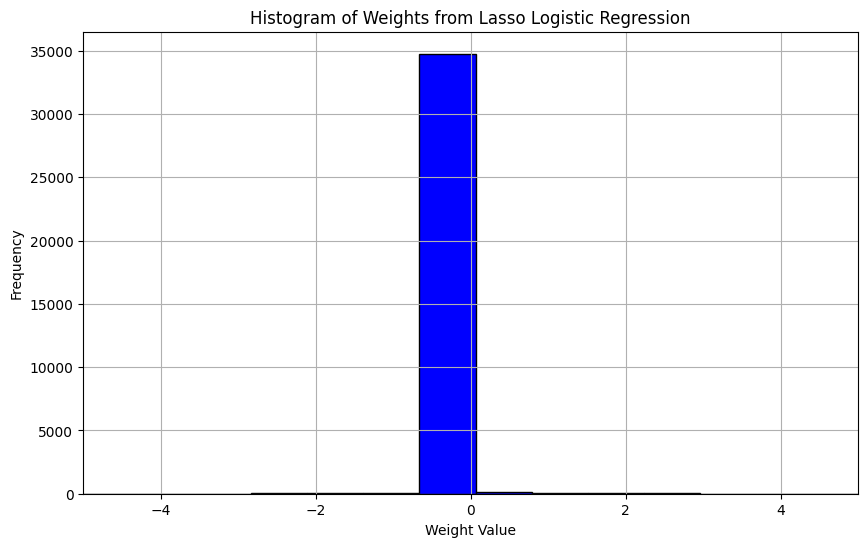

In [82]:
# plot  histogram of weights

plt.figure(figsize=(10, 6))
plt.hist(weights, bins=50, color='blue', edgecolor='black')

plt.xlim(-5, 5)
plt.grid(True)

plt.title('Histogram of Weights from Lasso Logistic Regression')
plt.xlabel('Weight Value')
plt.ylabel('Frequency')
plt.show()



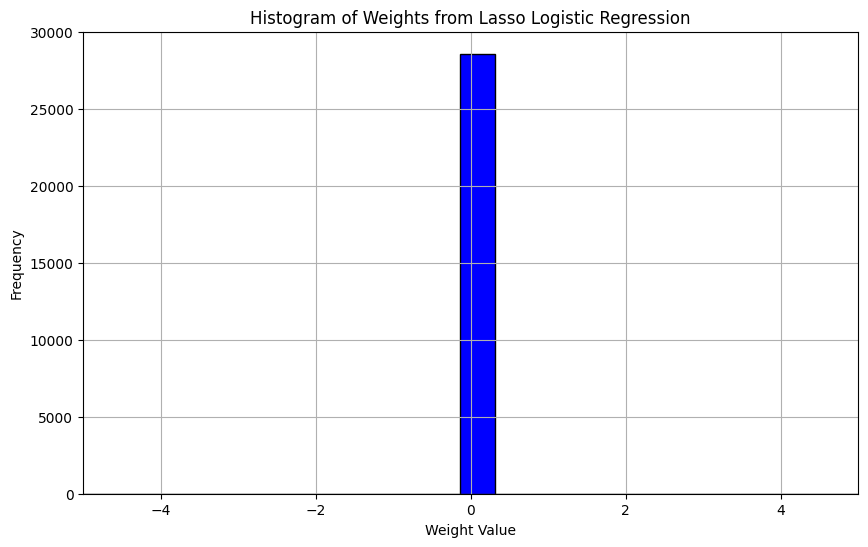

In [8]:
# plot  histogram of weights - 41401

plt.figure(figsize=(10, 6))
plt.hist(weights, bins=50, color='blue', edgecolor='black')

plt.xlim(-5, 5)
plt.grid(True)

plt.title('Histogram of Weights from Lasso Logistic Regression')
plt.xlabel('Weight Value')
plt.ylabel('Frequency')
plt.show()

In [9]:
# Number of features with high weight
high_weight_threshold = 0.1  # Example threshold
high_weight_features = np.sum(np.abs(weights) > high_weight_threshold)

In [10]:
print(f"Number of features with high weight: {high_weight_features}")
print(f"Total number of features: {len(weights)}")

Number of features with high weight: 23
Total number of features: 28610


In [85]:
print(X.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/usr/local/lib/python3.10/dist-packages/shap/explainers/_linear.py:95: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


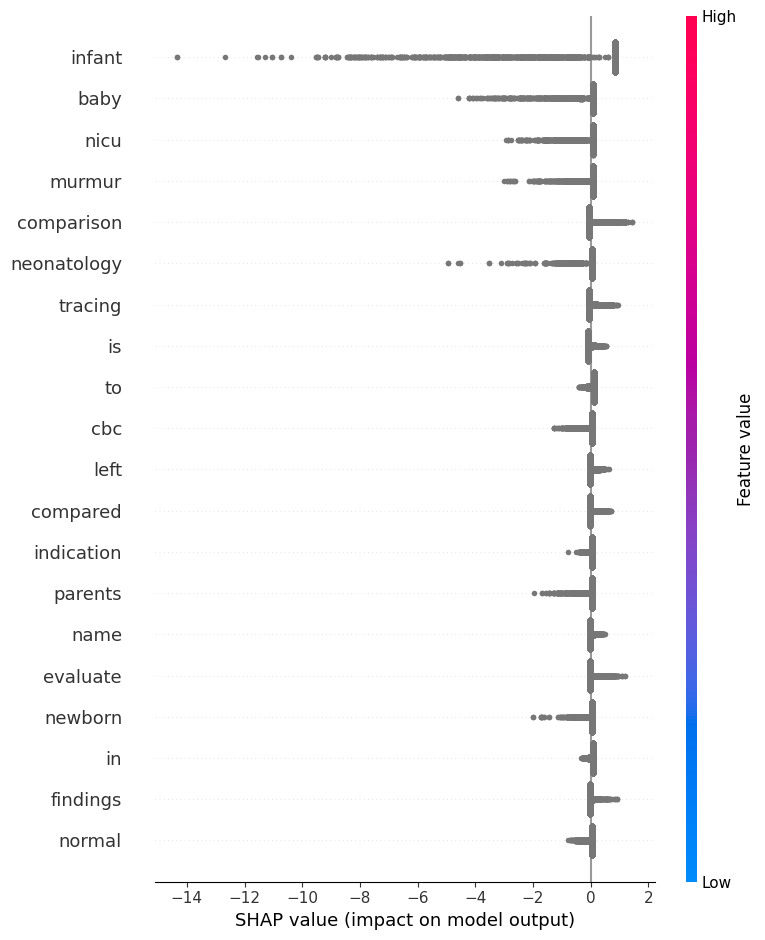

In [86]:
# SHAP - calculate the contribution of each feature to the model's prediction
# interventional perturbation - model predictions are adjusted based on the distribution of the other features. more accurate but computationally expensive - it tries to account for the interdependencies between features

explainer = shap.LinearExplainer(model, X, feature_perturbation="interventional")
shap_values = explainer.shap_values(X)

shap.summary_plot(shap_values, X, feature_names=vectorizer.get_feature_names_out())

In [11]:
feature_names = vectorizer.get_feature_names_out()

print(feature_names)

['00' '000' '0000' ... 'zyprexa' 'zyrtec' 'zyvox']


https://shap.readthedocs.io/en/latest/example_notebooks/text_examples/sentiment_analysis/Emotion%20classification%20multiclass%20example.html

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=0)


In [14]:
data = pd.DataFrame({"text": df_train["TEXT"], "label": df_train["label"]})

In [15]:
import transformers

In [16]:
# load the model and tokenizer
tokenizer = transformers.AutoTokenizer.from_pretrained("google-bert/bert-base-uncased", use_fast=True)
model = transformers.AutoModelForSequenceClassification.from_pretrained("google-bert/bert-base-uncased").cuda()

# build a pipeline object to do predictions
pred = transformers.pipeline(
    "text-classification",
    model=model,
    tokenizer=tokenizer,
    device=0,
    return_all_scores=True,
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [19]:
explainer = shap.Explainer(pred)

In [94]:
shap_values = explainer(data["text"][:3]) # this didn't work for hyperlipidemia or 41401 but has for the original dataset (maybe it needs more data to work)

  0%|          | 0/498 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  67%|██████▋   | 2/3 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 4it [00:31, 15.93s/it]


In [69]:
# Visualize the impact on all the output classes - # hyperlipidemia - 2724

shap.plots.text(shap_values)

In [95]:
# Visualize the impact on all the output classes - # original - HTN

shap.plots.text(shap_values)

Output hidden; open in https://colab.research.google.com to view.

In [71]:
# Visualize the impact on a single class - # hyperlipidemia - 2724

shap.plots.text(shap_values[:, :, "LABEL_0"])

In [96]:
# Visualize the impact on a single class - # original - HTN

shap.plots.text(shap_values[:, :, "LABEL_0"])

In [72]:
# Visualize the impact on a single class - # hyperlipidemia - 2724

shap.plots.text(shap_values[:, :, "LABEL_1"])

In [97]:
# Visualize the impact on a single class - # original - HTN

shap.plots.text(shap_values[:, :, "LABEL_1"])

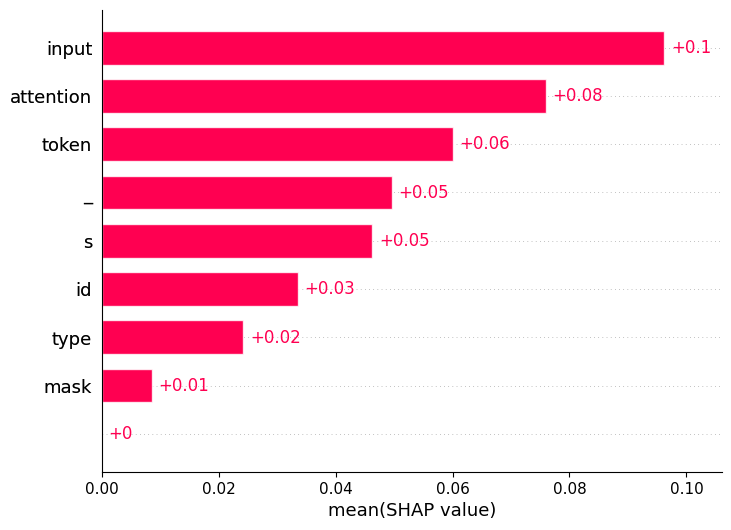

In [58]:
# Plotting the top words impacting a specific class - # hyperlipidemia - 2724

shap.plots.bar(shap_values[:, :, "LABEL_0"].mean(0))

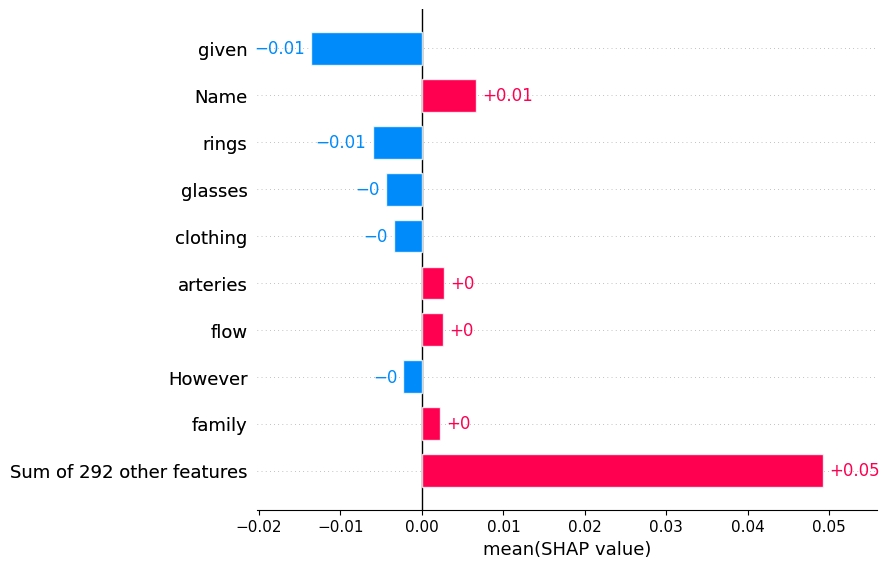

In [98]:
# Plotting the top words impacting a specific class - # original - HTN

shap.plots.bar(shap_values[:, :, "LABEL_0"].mean(0))

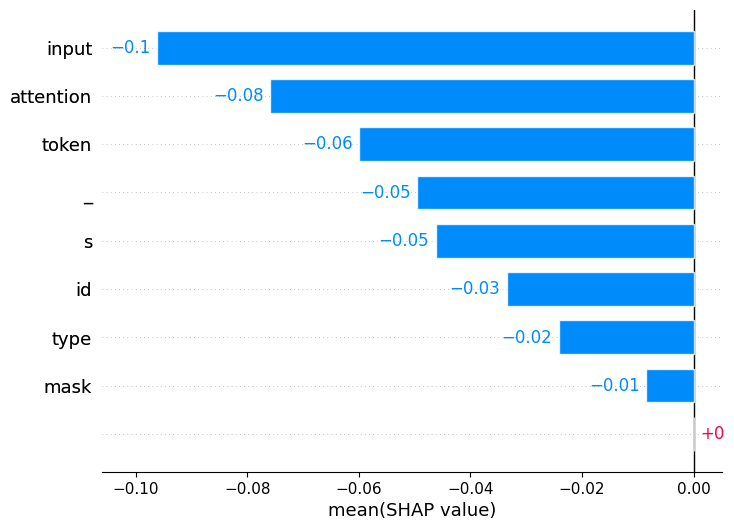

In [59]:
shap.plots.bar(shap_values[:, :, "LABEL_1"].mean(0))  # hyperlipidemia - 2724

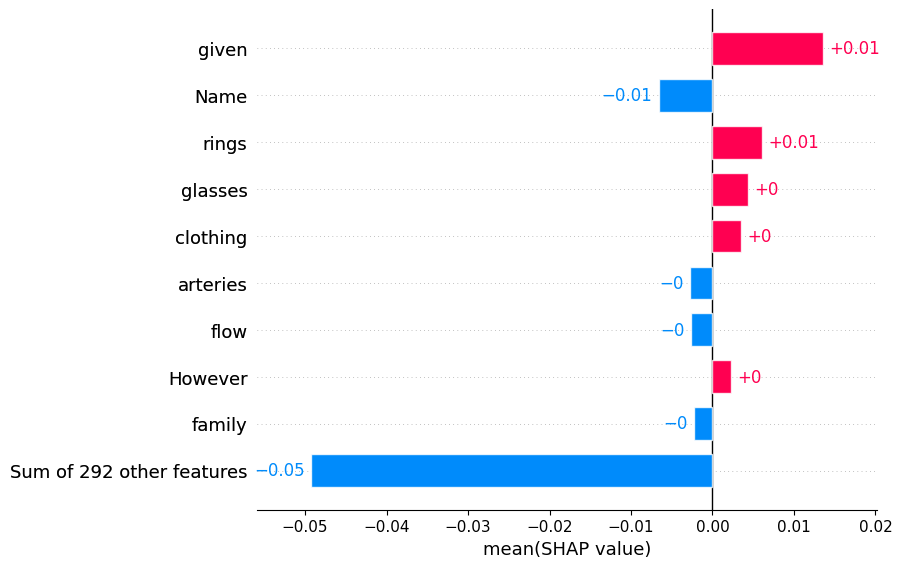

In [100]:
shap.plots.bar(shap_values[:, :, "LABEL_1"].mean(0)) # original HTN

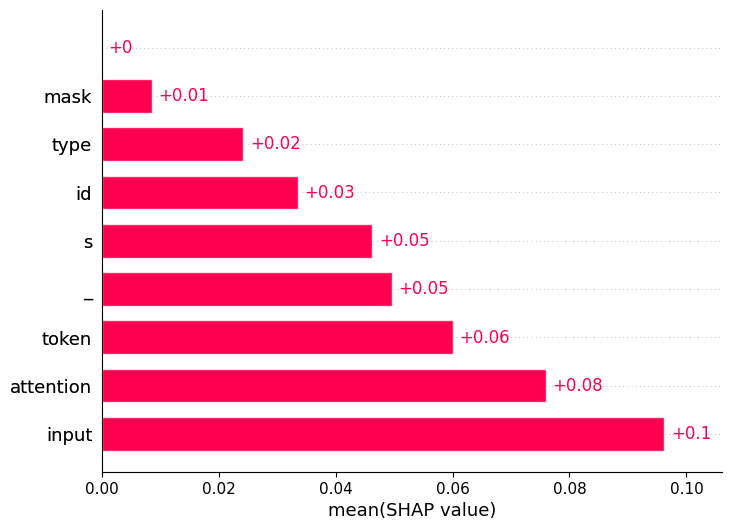

In [74]:
# we can sort the bar chart in decending order - # hyperlipidemia - 2724
shap.plots.bar(shap_values[:, :, "LABEL_0"].mean(0), order=shap.Explanation.argsort)

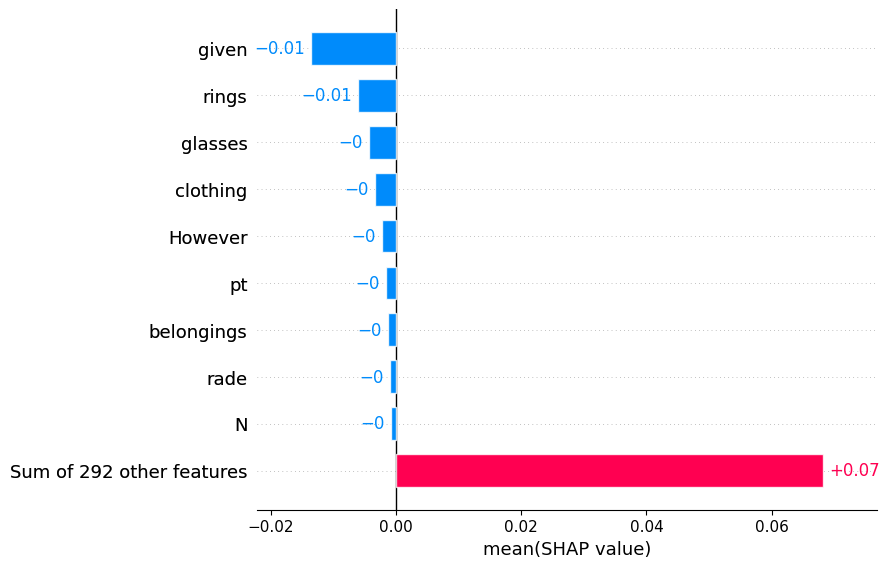

In [101]:
# we can sort the bar chart in decending order - # original HTN
shap.plots.bar(shap_values[:, :, "LABEL_0"].mean(0), order=shap.Explanation.argsort)

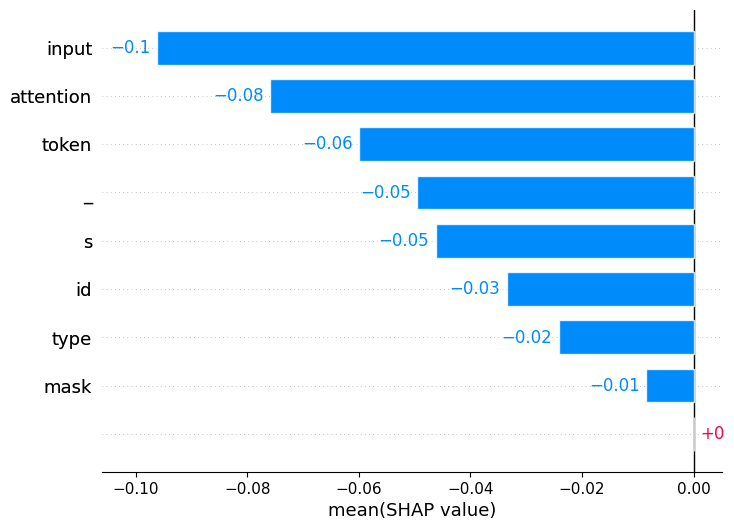

In [75]:
# we can sort the bar chart in decending order - # hyperlipidemia - 2724
shap.plots.bar(shap_values[:, :, "LABEL_1"].mean(0), order=shap.Explanation.argsort)

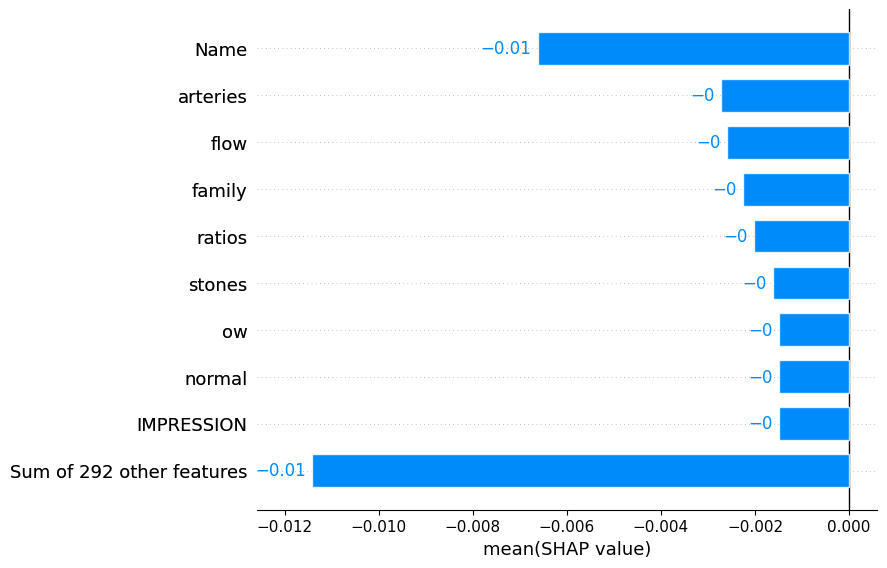

In [102]:
# we can sort the bar chart in decending order - # original HTN
shap.plots.bar(shap_values[:, :, "LABEL_1"].mean(0), order=shap.Explanation.argsort)

In [24]:
# Explain the log odds instead of the probabilities - # hyperlipidemia - 2724 and 41401 didnt work

logit_explainer = shap.Explainer(shap.models.TransformersPipeline(pred, rescale_to_logits=True))

logit_shap_values = logit_explainer(data["text"][:3])
shap.plots.text(logit_shap_values)

RuntimeError: The size of tensor a (2239) must match the size of tensor b (512) at non-singleton dimension 1

In [103]:
# Explain the log odds instead of the probabilities - # original HTN

logit_explainer = shap.Explainer(shap.models.TransformersPipeline(pred, rescale_to_logits=True))

logit_shap_values = logit_explainer(data["text"][:3])
shap.plots.text(logit_shap_values)

Output hidden; open in https://colab.research.google.com to view.

In [36]:
!pip install scikit-learn==1.0.2
!pip install --upgrade eli5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 33.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.13.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.0.2 which is incompatible.


In [25]:
import eli5
from eli5.sklearn import PermutationImportance
import numpy as np

ModuleNotFoundError: No module named 'eli5'

In [104]:
tfidf = TfidfVectorizer(max_features=1000)
X = tfidf.fit_transform(df['text'])
y = df['label']

In [105]:
lasso_log_reg = LogisticRegression(penalty='l1', solver='liblinear')
lasso_log_reg.fit(X, y)

LogisticRegression(penalty='l1', solver='liblinear')

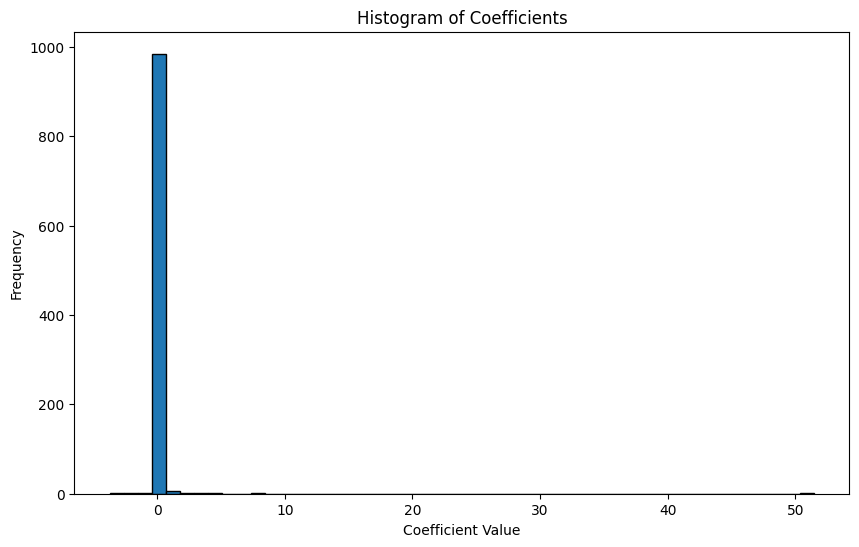

In [26]:
# analyse weights - hyperlipidemia 2724

coefficients = lasso_log_reg.coef_.flatten()

plt.figure(figsize=(10, 6))
plt.hist(coefficients, bins=50, edgecolor='k')
plt.title("Histogram of Coefficients")
plt.xlabel("Coefficient Value")
plt.ylabel("Frequency")
plt.show()

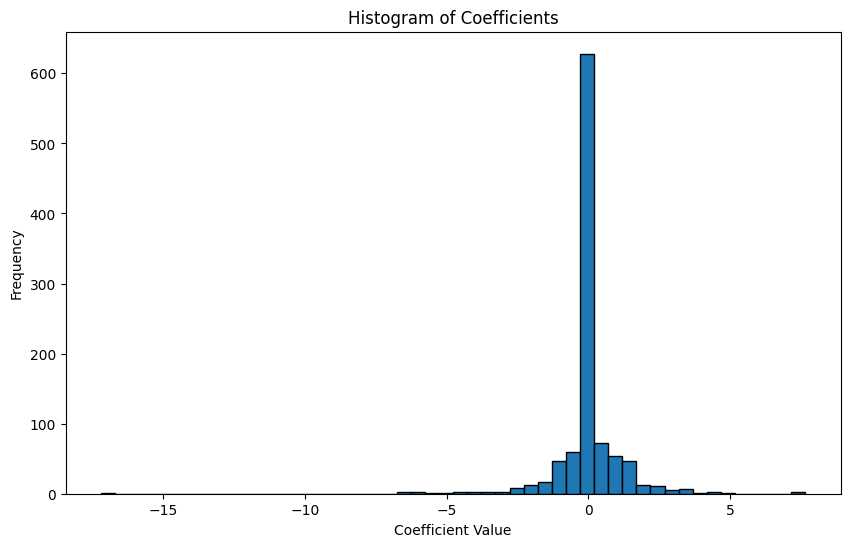

In [106]:
# analyse weights - original HTN - how many in middle - number of almost 0 parameters words and number of high coeff words and compare with others of same size.

coefficients = lasso_log_reg.coef_.flatten()

plt.figure(figsize=(10, 6))
plt.hist(coefficients, bins=50, edgecolor='k')
plt.title("Histogram of Coefficients")
plt.xlabel("Coefficient Value")
plt.ylabel("Frequency")
plt.show()

In [27]:
# numner of non-zero coeffs i.e., features with high weight - hyperlipidemia 2724

non_zero_coefs = np.sum(coefficients != 0)
print(f"Number of non-zero coefficients: {non_zero_coefs}")

Number of non-zero coefficients: 20


In [107]:
# numner of non-zero coeffs i.e., features with high weight - original HTN

non_zero_coefs = np.sum(coefficients != 0)
print(f"Number of non-zero coefficients: {non_zero_coefs}")

Number of non-zero coefficients: 439


In [28]:
# feature names and coeffs - hyperlipidemia 2724

feature_names = tfidf.get_feature_names_out()
coef_df = pd.DataFrame({'feature': feature_names, 'coefficient': coefficients})
sorted_coef_df = coef_df.sort_values(by='coefficient', ascending=False)

In [108]:
# feature names and coeffs - original HTN

feature_names = tfidf.get_feature_names_out()
coef_df = pd.DataFrame({'feature': feature_names, 'coefficient': coefficients})
sorted_coef_df = coef_df.sort_values(by='coefficient', ascending=False)

In [29]:
# show top features - hyperlipidemia 2724

print(eli5.format_as_text(eli5.explain_weights(lasso_log_reg, feature_names=feature_names)))

Explained as: linear model

Features with largest coefficients.
Caveats:
1. Be careful with features which are not
   independent - weights don't show their importance.
2. If scale of input features is different then scale of coefficients
   will also be different, making direct comparison between coefficient values
   incorrect.
3. Depending on regularization, rare features sometimes may have high
   coefficients; this doesn't mean they contribute much to the
   classification result for most examples.

y=1 top features
 Weight  Feature       
-------  --------------
+51.475  hyperlipidemia
 +7.963  daily         
 +4.297  or            
 +3.487  simvastatin   
 +3.236  cardiac       
 +2.888  aortic        
 +1.663  2106          
 +1.617  left          
 +1.406  10            
 +0.961  you           
 +0.716  2189          
 +0.575  06            
 +0.212  2114          
 +0.133  2185          
 +0.075  2165          
  … 1 more positive …  
 -0.900  <BIAS>        
 -1.373  neg     

In [109]:
# show top features - original HTN

print(eli5.format_as_text(eli5.explain_weights(lasso_log_reg, feature_names=feature_names)))

Explained as: linear model

Features with largest coefficients.
Caveats:
1. Be careful with features which are not
   independent - weights don't show their importance.
2. If scale of input features is different then scale of coefficients
   will also be different, making direct comparison between coefficient values
   incorrect.
3. Depending on regularization, rare features sometimes may have high
   coefficients; this doesn't mean they contribute much to the
   classification result for most examples.

y=1 top features
 Weight  Feature          
-------  -----------------
 +7.668  contraindications
 +7.306  htn              
 +4.748  office           
 +4.611  interpretation   
 +4.570  hypertension     
 +3.900  surgery          
 +3.550  comparison       
  … 238 more positive …   
  … 182 more negative …   
 -3.680  42               
 -3.762  test             
 -3.899  id               
 -3.960  57               
 -4.307  newborn          
 -4.476  indication       
 -5.113  root 

In [110]:
# SHAP

explainer = shap.LinearExplainer(lasso_log_reg, X, feature_perturbation="interventional")
shap_values = explainer.shap_values(X)

/usr/local/lib/python3.10/dist-packages/shap/explainers/_linear.py:95: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


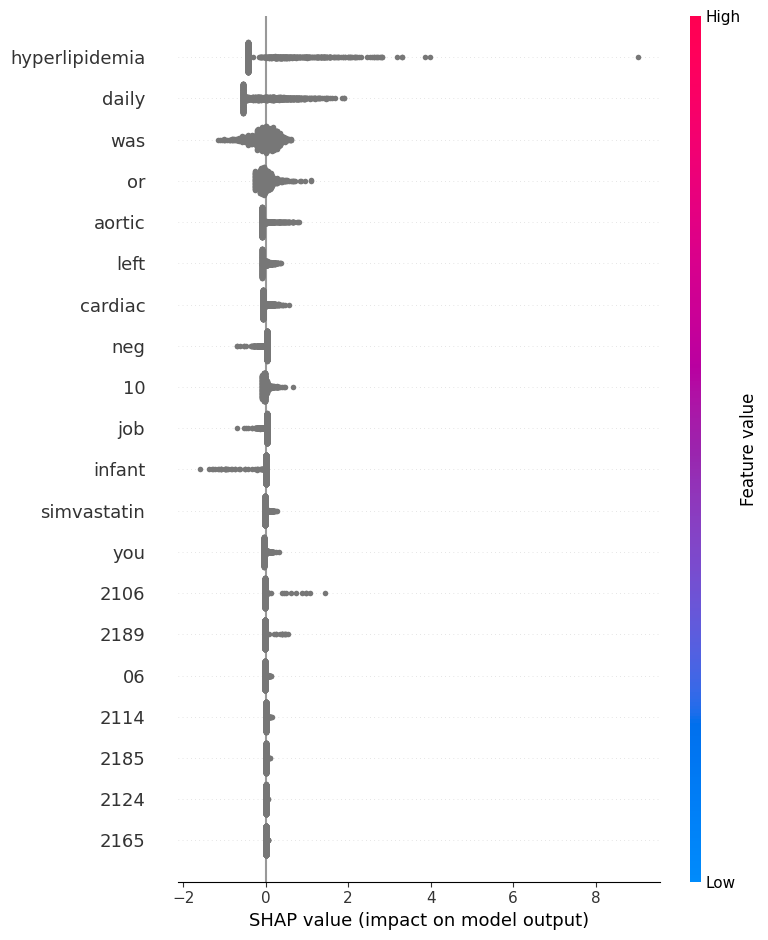

In [31]:
shap.summary_plot(shap_values, features=X, feature_names=feature_names) # - hyperlipidemia 2724

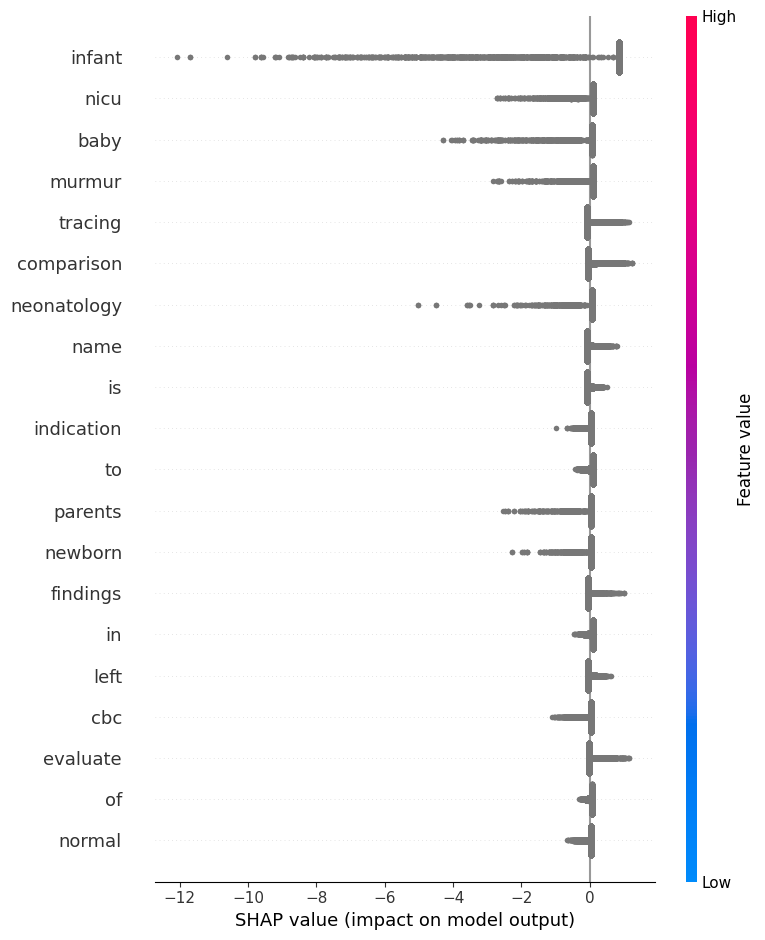

In [111]:
shap.summary_plot(shap_values, features=X, feature_names=feature_names) # - original HTN

In [112]:
# predict the labels

predicted_labels = (coefficients > 0).astype(int)
print("Predicted labels based on coefficients: ", predicted_labels)

Predicted labels based on coefficients:  [0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1
 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0
 1 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1
 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 

In [113]:
# add original labels counts to feature names and coeffs

label_counts = df.groupby('label').size().to_dict()
coef_df['label_count'] = coef_df['feature'].apply(lambda x: label_counts.get(x, 0))

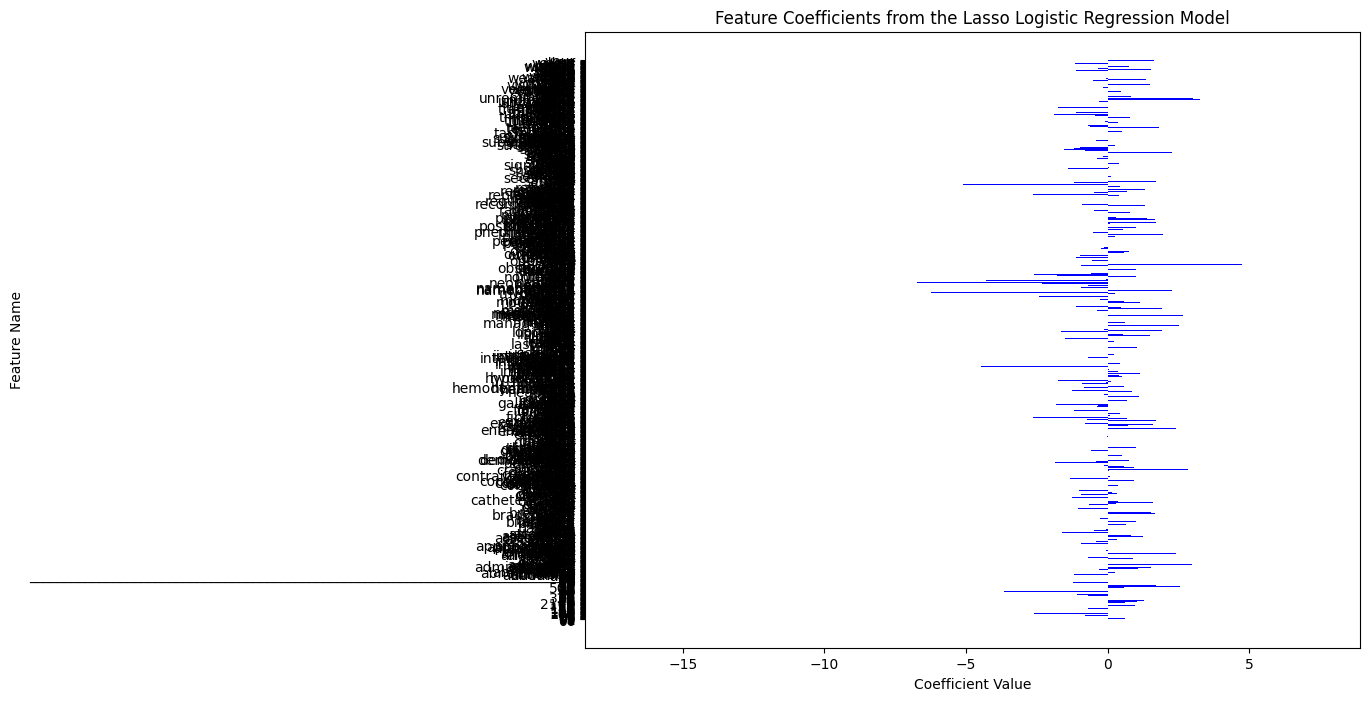

In [114]:
# plot coeffs with original label - original HTN

plt.figure(figsize=(10, 8))
plt.barh(coef_df['feature'], coef_df['coefficient'], color='blue')
plt.xlabel("Coefficient Value")
plt.ylabel("Feature Name")
plt.title("Feature Coefficients from the Lasso Logistic Regression Model")
plt.show()

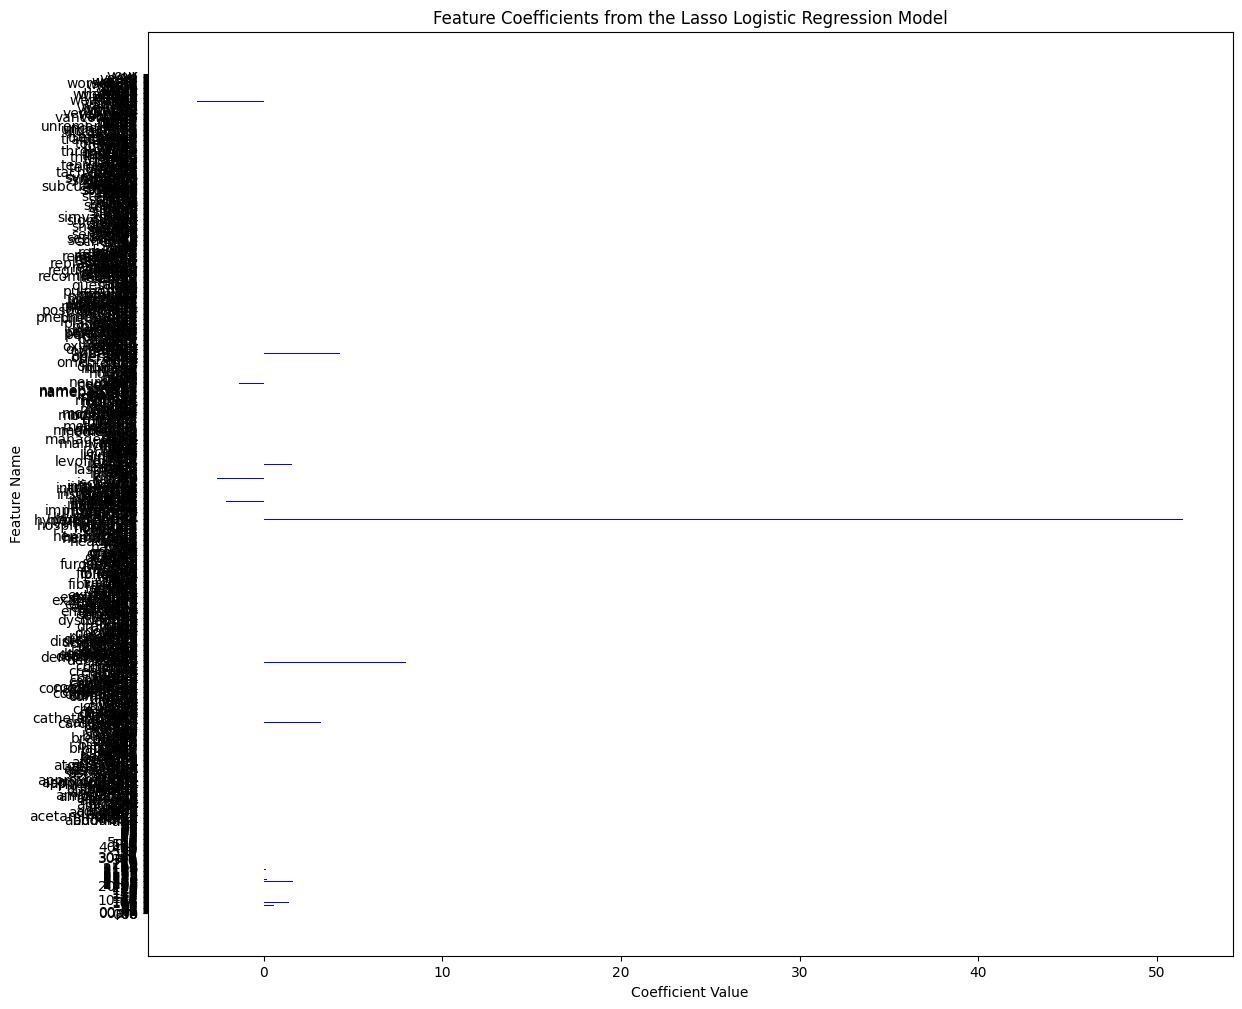

In [35]:
plt.figure(figsize=(14, 12))  # Increase the figure size - hyperlipidemia 2724
plt.barh(coef_df['feature'], coef_df['coefficient'], color='blue')
plt.xlabel("Coefficient Value")
plt.ylabel("Feature Name")
plt.title("Feature Coefficients from the Lasso Logistic Regression Model")
plt.show()

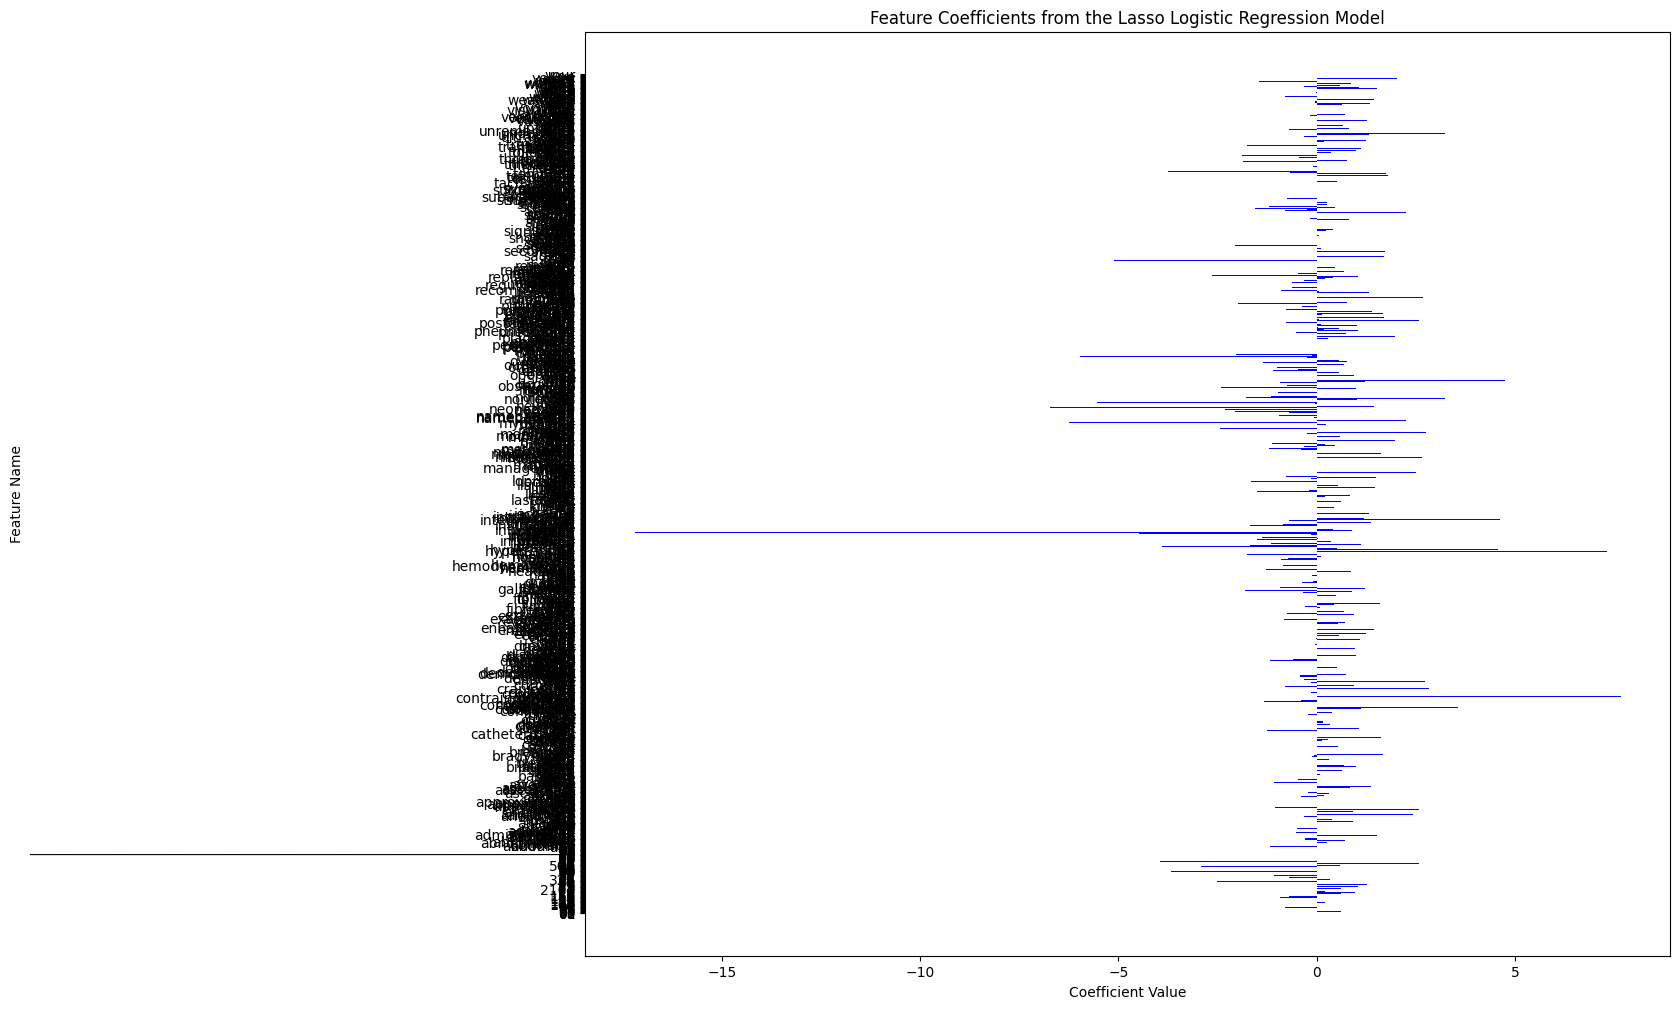

In [115]:
plt.figure(figsize=(14, 12))  # Increase the figure size - original HTN
plt.barh(coef_df['feature'], coef_df['coefficient'], color='blue')
plt.xlabel("Coefficient Value")
plt.ylabel("Feature Name")
plt.title("Feature Coefficients from the Lasso Logistic Regression Model")
plt.show()

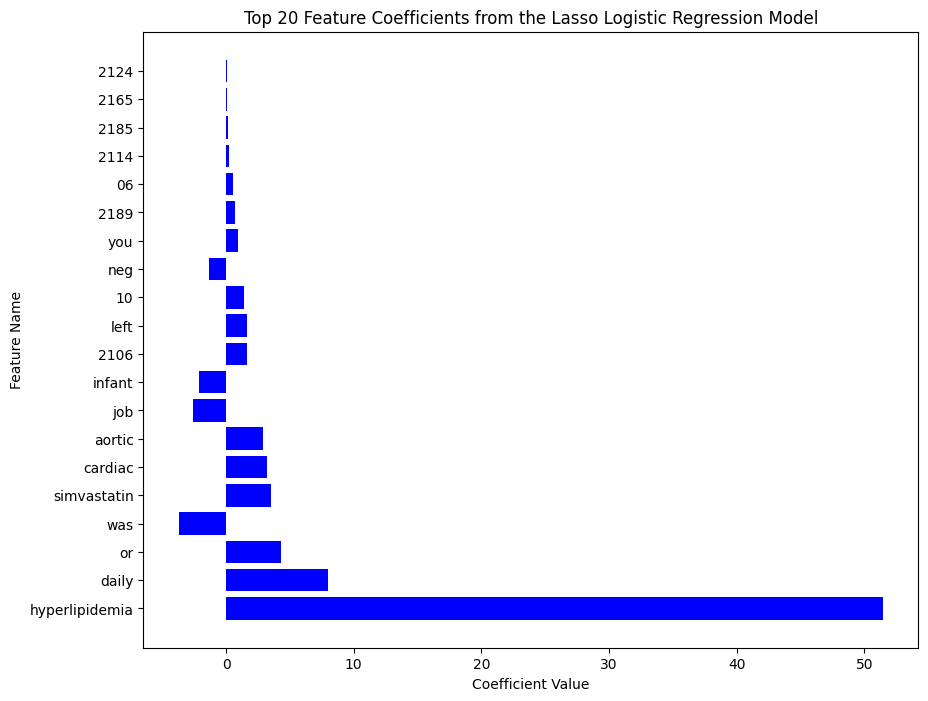

In [36]:
# Show only the top 20 features by absolute coefficient value - - hyperlipidemia 2724
top_n = 20
top_features = coef_df.reindex(coef_df['coefficient'].abs().sort_values(ascending=False).index)[:top_n]

plt.figure(figsize=(10, 8))
plt.barh(top_features['feature'], top_features['coefficient'], color='blue')
plt.xlabel("Coefficient Value")
plt.ylabel("Feature Name")
plt.title(f"Top {top_n} Feature Coefficients from the Lasso Logistic Regression Model")
plt.show()

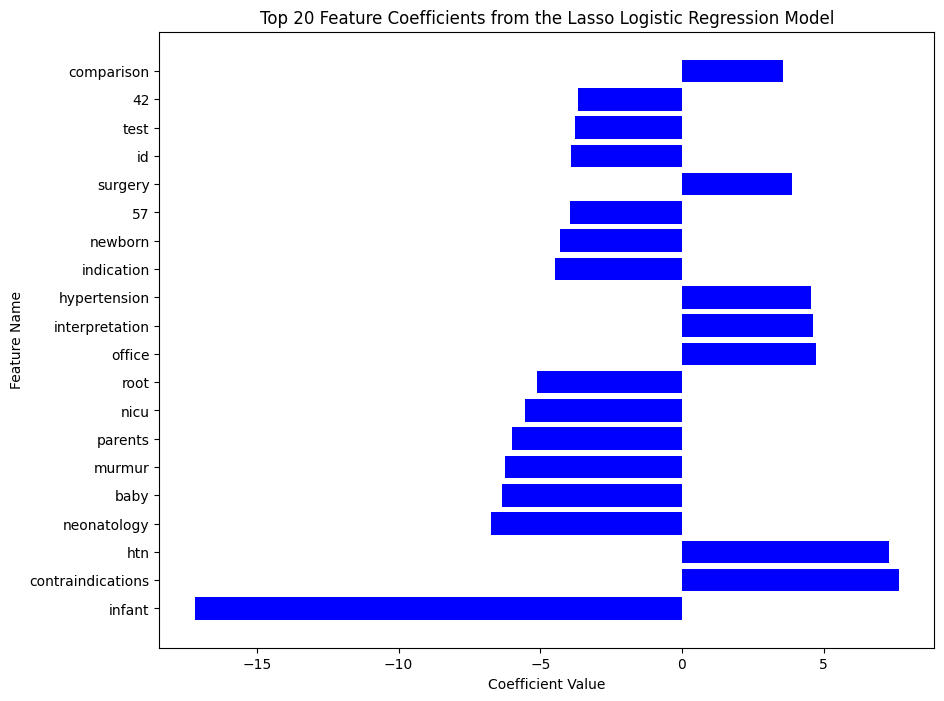

In [116]:
# Show only the top 20 features by absolute coefficient value - original HTN
top_n = 20
top_features = coef_df.reindex(coef_df['coefficient'].abs().sort_values(ascending=False).index)[:top_n]

plt.figure(figsize=(10, 8))
plt.barh(top_features['feature'], top_features['coefficient'], color='blue')
plt.xlabel("Coefficient Value")
plt.ylabel("Feature Name")
plt.title(f"Top {top_n} Feature Coefficients from the Lasso Logistic Regression Model")
plt.show()

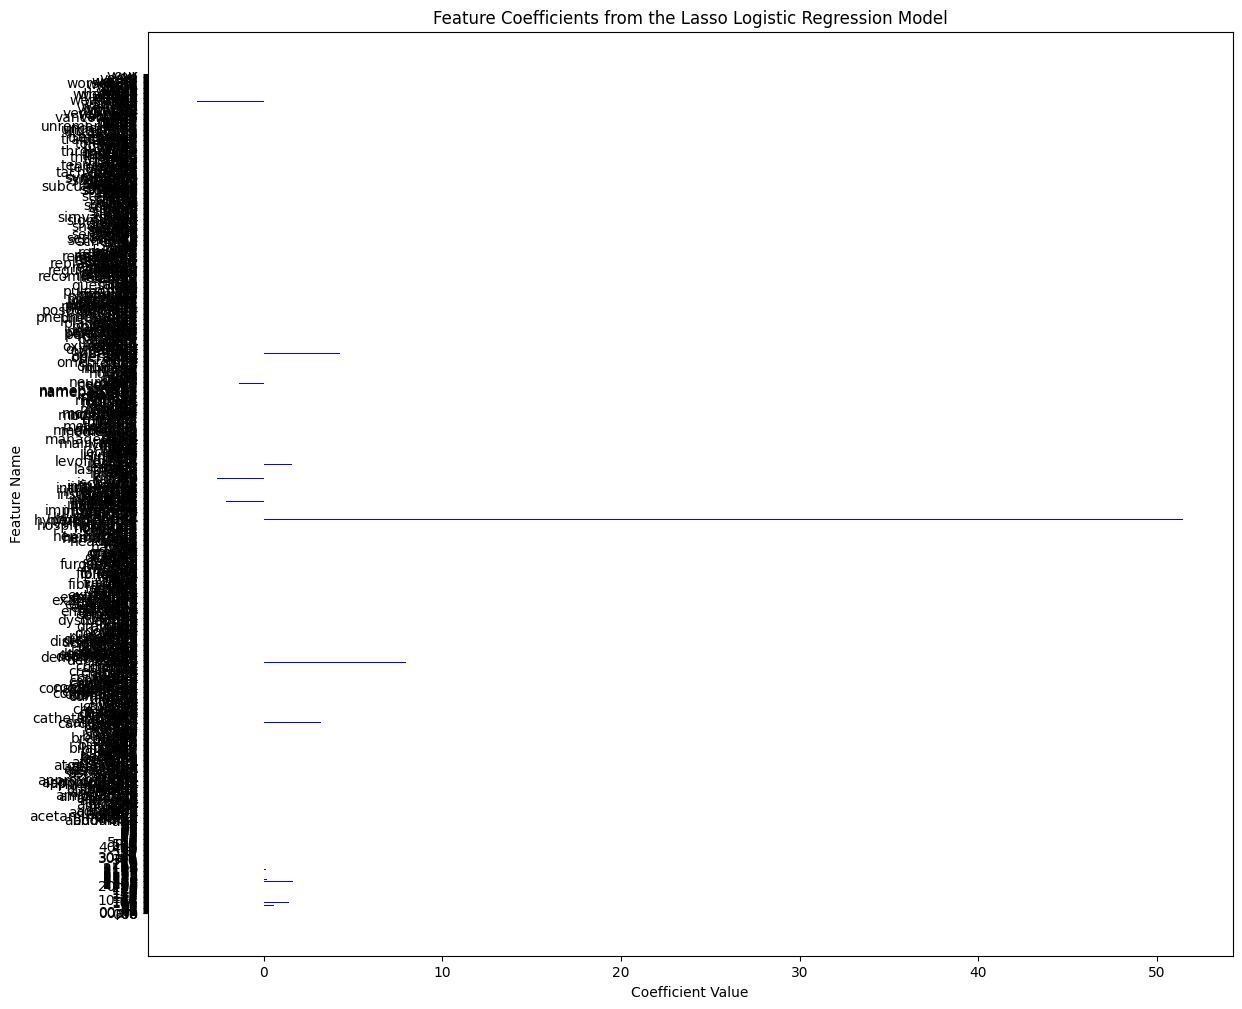

In [37]:
# rotate labels -  - hyperlipidemia 2724

plt.figure(figsize=(14, 12))
plt.barh(coef_df['feature'], coef_df['coefficient'], color='blue')
plt.xlabel("Coefficient Value")
plt.ylabel("Feature Name")
plt.title("Feature Coefficients from the Lasso Logistic Regression Model")
plt.yticks(rotation=0, ha='right')  # Rotate labels if needed
plt.show()


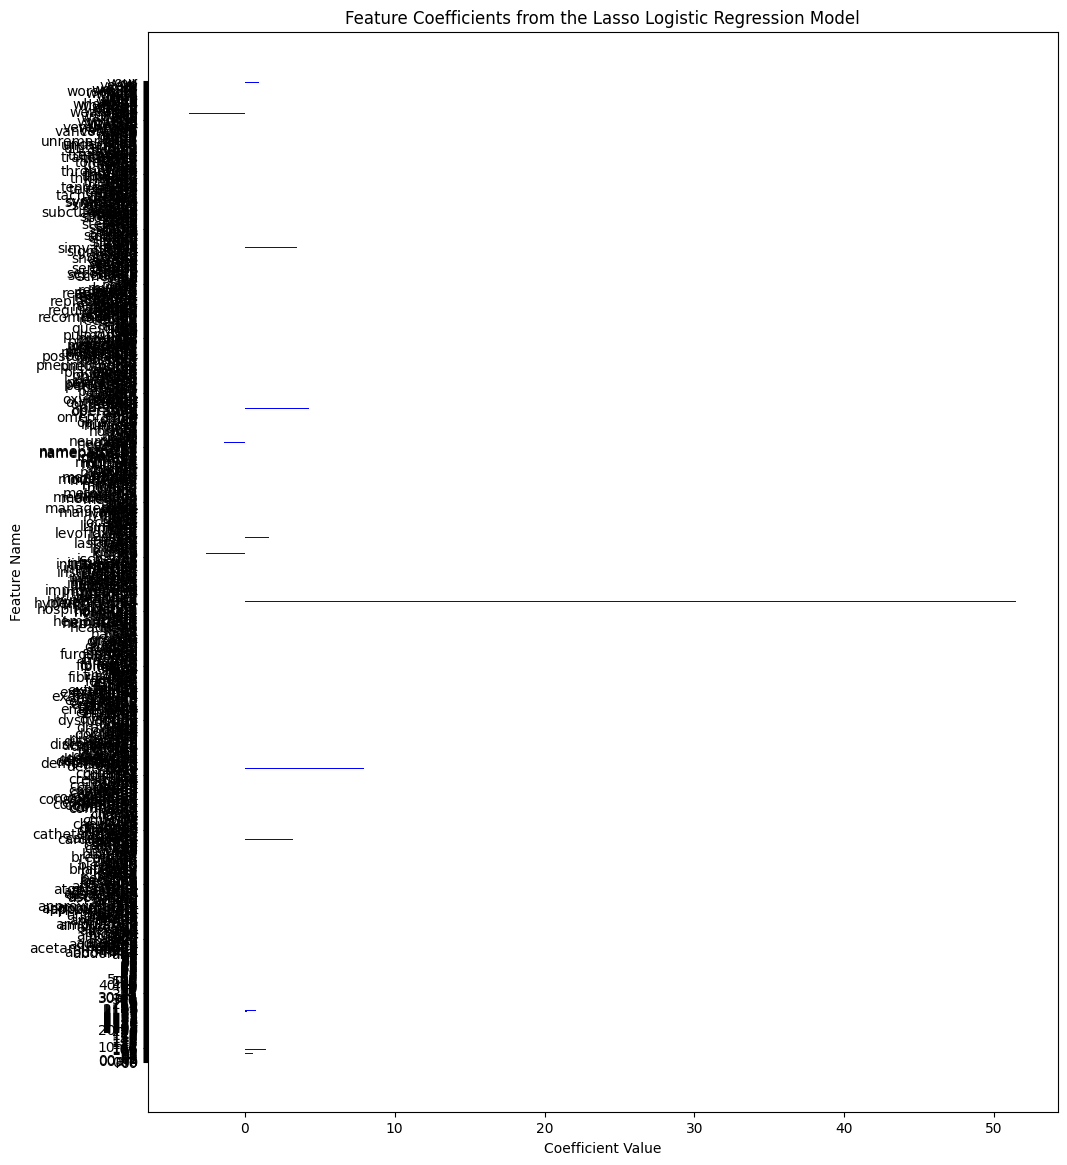

In [38]:
# adjust label spacing -  - hyperlipidemia 2724

plt.figure(figsize=(14, 12))
plt.barh(coef_df['feature'], coef_df['coefficient'], color='blue')
plt.xlabel("Coefficient Value")
plt.ylabel("Feature Name")
plt.title("Feature Coefficients from the Lasso Logistic Regression Model")
plt.subplots_adjust(left=0.3, right=0.95, top=0.95, bottom=0.05)  # Adjust spacing
plt.show()


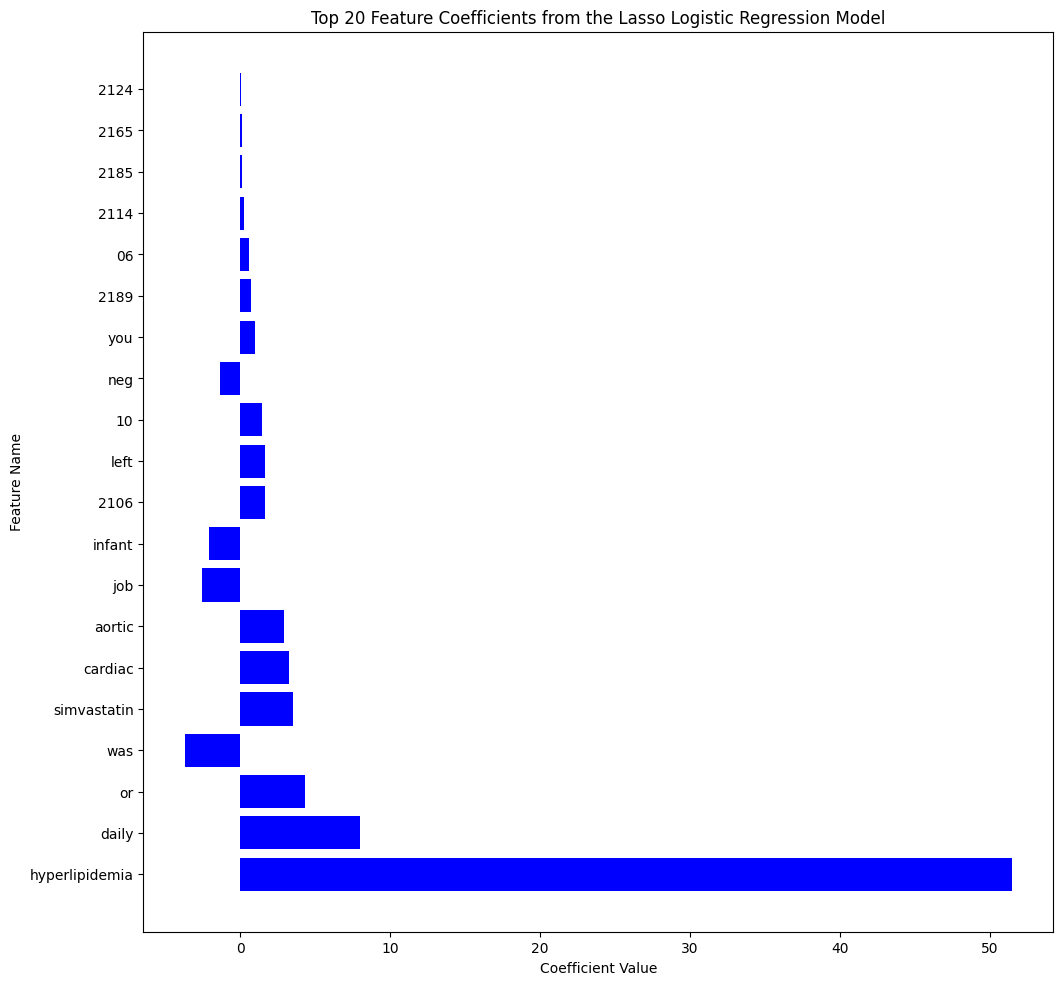

In [39]:
# Limit to top 20 features and increase figure size - - hyperlipidemia 2724
top_n = 20
top_features = coef_df.reindex(coef_df['coefficient'].abs().sort_values(ascending=False).index)[:top_n]

plt.figure(figsize=(14, 10))
plt.barh(top_features['feature'], top_features['coefficient'], color='blue')
plt.xlabel("Coefficient Value")
plt.ylabel("Feature Name")
plt.title(f"Top {top_n} Feature Coefficients from the Lasso Logistic Regression Model")
plt.yticks(rotation=0, ha='right')
plt.subplots_adjust(left=0.3, right=0.95, top=0.95, bottom=0.05)
plt.show()


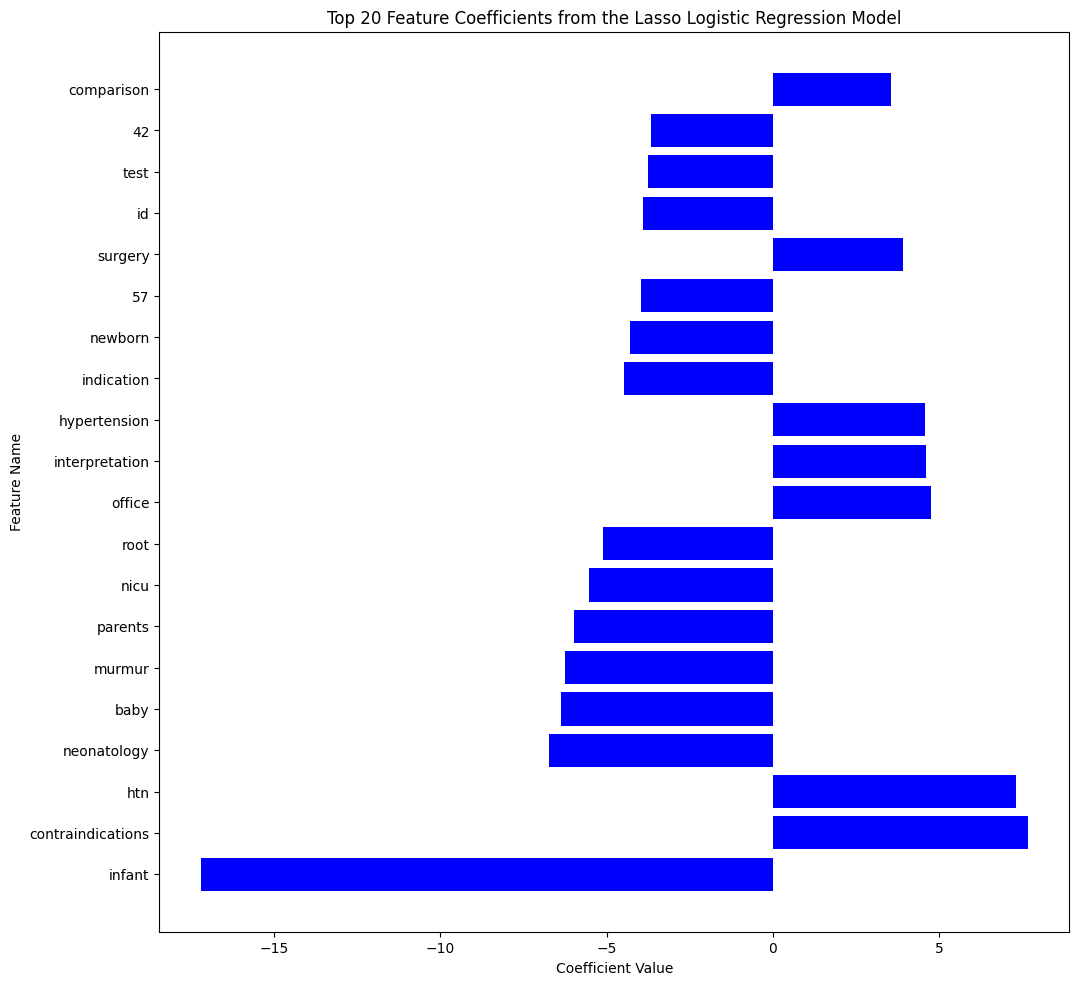

In [117]:
# Limit to top 20 features and increase figure size - original HTN
top_n = 20
top_features = coef_df.reindex(coef_df['coefficient'].abs().sort_values(ascending=False).index)[:top_n]

plt.figure(figsize=(14, 10))
plt.barh(top_features['feature'], top_features['coefficient'], color='blue')
plt.xlabel("Coefficient Value")
plt.ylabel("Feature Name")
plt.title(f"Top {top_n} Feature Coefficients from the Lasso Logistic Regression Model")
plt.yticks(rotation=0, ha='right')
plt.subplots_adjust(left=0.3, right=0.95, top=0.95, bottom=0.05)
plt.show()

# from previous file

In [252]:
lasso = LogisticRegression(penalty='l1', solver='liblinear')
lasso.fit(X, y)

LogisticRegression(penalty='l1', solver='liblinear')

In [253]:
feature_names = vectorizer.get_feature_names_out()

In [254]:
feature_names

array(['00', '000', '000mg', ..., 'zygomaticosphenoid', 'zyprexa',
       'zyrtec'], dtype=object)

In [255]:
coefficients = lasso.coef_[0]

In [256]:
coefficients

array([0., 0., 0., ..., 0., 0., 0.])

In [257]:
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

In [258]:
coef_df.head(15)

Feature  Coefficient
0       00          0.0
1      000          0.0
2    000mg          0.0
3     000u          0.0
4      002          0.0
5      004          0.0
6      005          0.0
7      006          0.0
8      007          0.0
9      008          0.0
10     009          0.0
11     00a          0.0
12    00am          0.0
13     00p          0.0
14    00pm          0.0

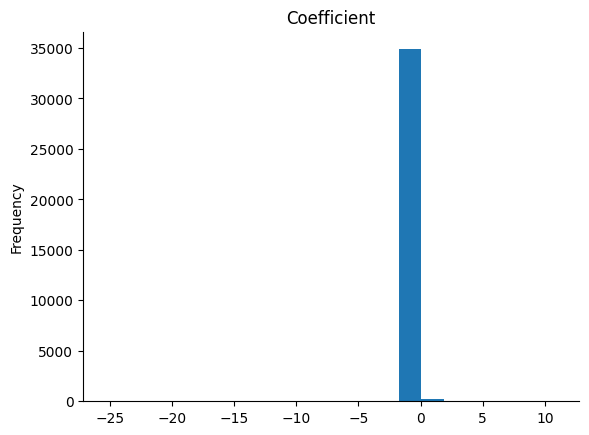

In [132]:
# for original HTN
from matplotlib import pyplot as plt
coef_df['Coefficient'].plot(kind='hist', bins=20, title='Coefficient')
plt.gca().spines[['top', 'right',]].set_visible(False)

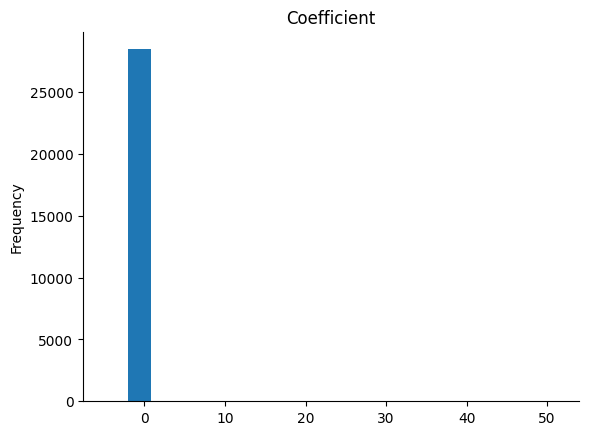

In [259]:
# hyperlipidemia - 2724

from matplotlib import pyplot as plt
coef_df['Coefficient'].plot(kind='hist', bins=20, title='Coefficient')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [260]:
# Sort the DataFrame by the absolute value of the coefficients in descending order
coef_df = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)

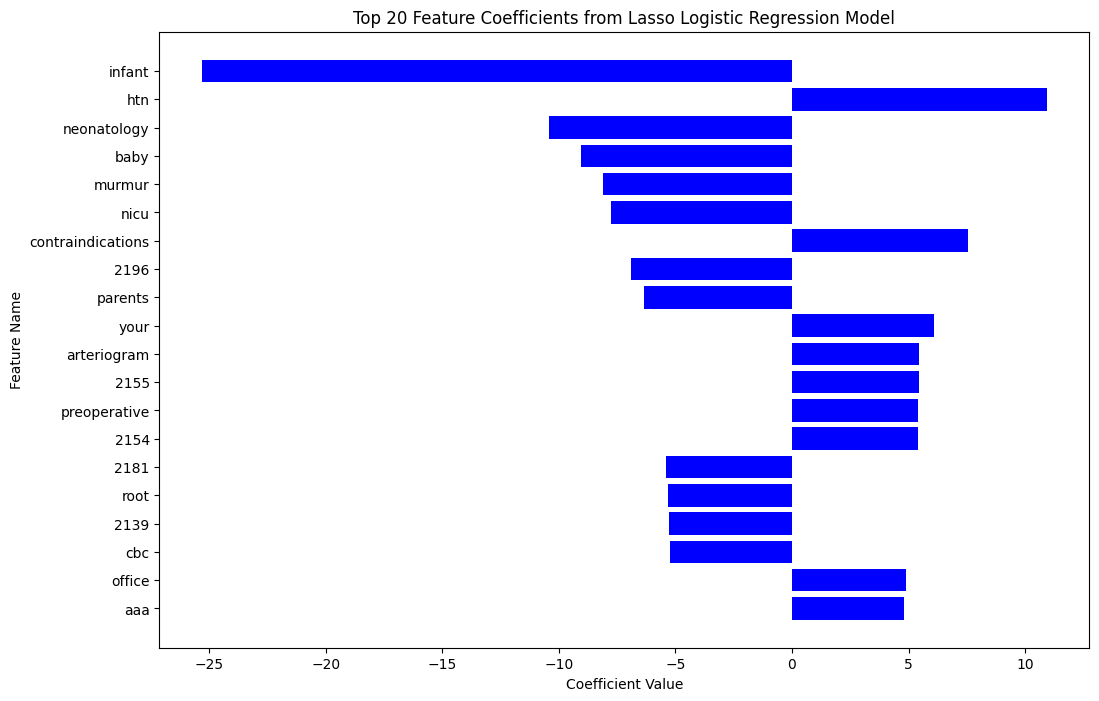

In [137]:
# for original HTN
# Calculate the absolute values of the coefficients to find the most important ones
coef_df['abs_coefficient'] = np.abs(coef_df['Coefficient'])

# Sort the DataFrame by the absolute value of the coefficients in descending order
coef_df_sorted = coef_df.sort_values(by='abs_coefficient', ascending=False)

# Select the top 20 most important features
top_20 = coef_df_sorted.head(20)

# Plot the coefficients for the top 20 features
plt.figure(figsize=(12, 8))  # Adjust the figure size for better readability
plt.barh(top_20['Feature'], top_20['Coefficient'], color='blue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature Name')
plt.title('Top 20 Feature Coefficients from Lasso Logistic Regression Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

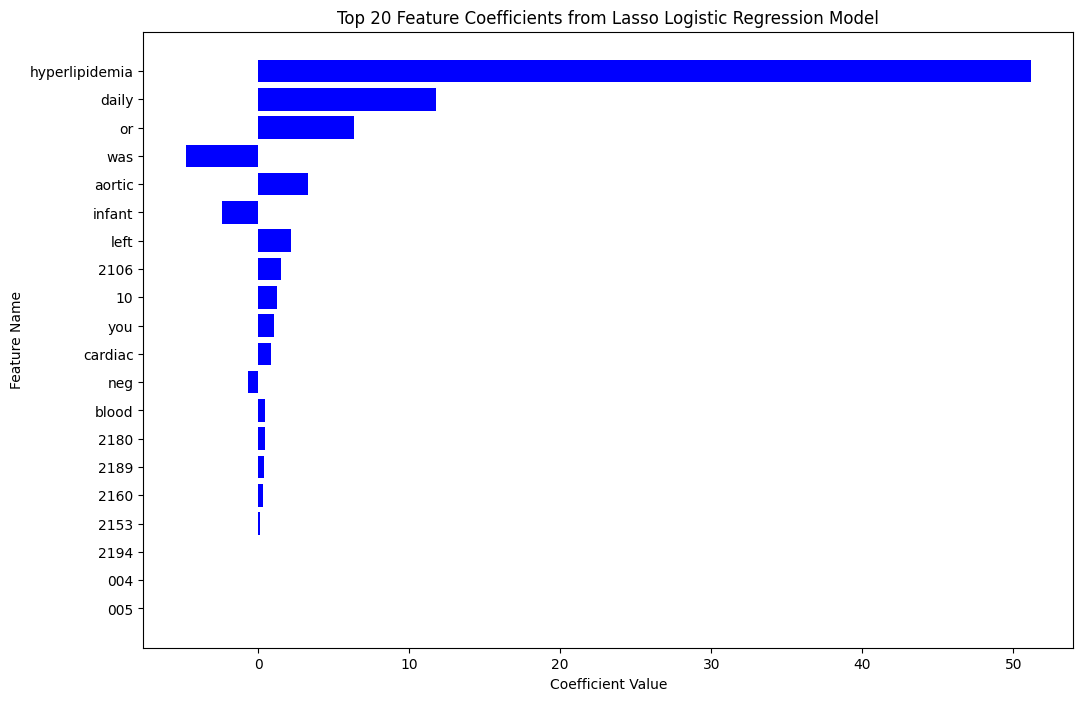

In [261]:
# for hyperlipidemia 2724
# Calculate the absolute values of the coefficients to find the most important ones
coef_df['abs_coefficient'] = np.abs(coef_df['Coefficient'])

# Sort the DataFrame by the absolute value of the coefficients in descending order
coef_df_sorted = coef_df.sort_values(by='abs_coefficient', ascending=False)

# Select the top 20 most important features
top_20 = coef_df_sorted.head(20)

# Plot the coefficients for the top 20 features
plt.figure(figsize=(12, 8))  # Adjust the figure size for better readability
plt.barh(top_20['Feature'], top_20['Coefficient'], color='blue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature Name')
plt.title('Top 20 Feature Coefficients from Lasso Logistic Regression Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

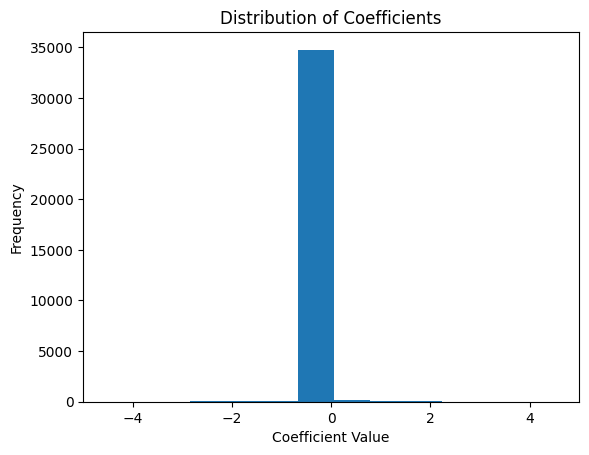

In [138]:
# Plot the distribution of the coefficients with x-axis from -5 to 5 -how many noisy parameters
# for original HTN

plt.hist(coefficients, bins=50)
plt.xlabel('Coefficient Value')
plt.ylabel('Frequency')
plt.title('Distribution of Coefficients')
plt.xlim(-5, 5)  # Set the x-axis limit from -5 to 5
plt.show()

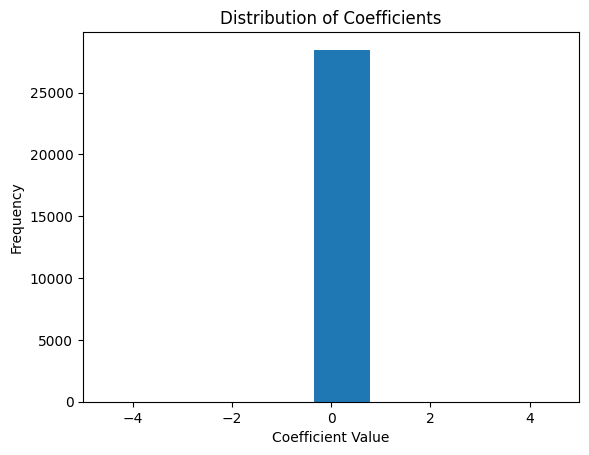

In [262]:
# Plot the distribution of the coefficients with x-axis from -5 to 5
# for hyperlipidemia 2724

plt.hist(coefficients, bins=50)
plt.xlabel('Coefficient Value')
plt.ylabel('Frequency')
plt.title('Distribution of Coefficients')
plt.xlim(-5, 5)  # Set the x-axis limit from -5 to 5
plt.show()

In [263]:
# Split the data into train (80%) and remaining (20%)
df_train, df_remaining = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])

In [264]:
# Split the remaining data into validation (10% of total) and test (10% of total)
df_val, df_test = train_test_split(df_remaining, test_size=0.5, random_state=42, stratify=df_remaining['label'])

In [265]:
# Verify the splits
print(f"Training set size: {len(df_train)}")
print(f"Validation set size: {len(df_val)}")
print(f"Test set size: {len(df_test)}")

Training set size: 800
Validation set size: 100
Test set size: 100


In [266]:
# Combine the training and validation sets for TF-IDF transformation and model training
combined_df = pd.concat([df_train, df_val])

In [270]:
# TF-IDF Transformation on the training and validation data
vectorizer = TfidfVectorizer()
X_combined = vectorizer.fit_transform(combined_df['TEXT'])
y_combined = combined_df['label']

In [271]:
# Logistic Lasso Regression on the combined training and validation data
lasso = LogisticRegression(penalty='l1', solver='liblinear')
lasso.fit(X_combined, y_combined)

LogisticRegression(penalty='l1', solver='liblinear')

In [272]:
# Get the feature names and coefficients
feature_names = vectorizer.get_feature_names_out()
coefficients = lasso.coef_[0]

In [273]:
# Create a DataFrame for the coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

In [274]:
# Add a column indicating if the feature is predictive of label 1 or 0 based on the coefficient's sign
coef_df['Predictive_Label'] = np.where(coef_df['Coefficient'] > 0, 1, 0)

In [275]:
# Sort the DataFrame by the absolute value of the coefficients in descending order
coef_df = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)

In [276]:
# Map the coefficients back to the original labels
# This involves associating each word in the feature set with the documents and their labels
X_original = vectorizer.transform(df['TEXT'])
df['predicted'] = lasso.predict(X_original)

In [277]:
# For each feature, determine the original label distribution
feature_label_dist = []
for feature in feature_names:
    indices = np.where(X_original[:, vectorizer.vocabulary_[feature]].toarray().flatten() > 0)[0]
    original_labels = df.iloc[indices]['label'].values
    label_1_count = np.sum(original_labels == 1)
    label_0_count = np.sum(original_labels == 0)
    feature_label_dist.append((feature, label_1_count, label_0_count))

In [278]:
# Create a DataFrame to store this information
feature_label_df = pd.DataFrame(feature_label_dist, columns=['Feature', 'Label_1_Count', 'Label_0_Count'])

In [279]:
feature_label_df.head()

Feature  Label_1_Count  Label_0_Count
0      00            160            108
1     000            124            140
2   000mg              3              4
3    000u              0              1
4     002              0              2

In [280]:
# Merge this with the coef_df
coef_df = coef_df.merge(feature_label_df, on='Feature')

In [154]:
# for original HTN

coef_df.head()

Feature  Coefficient  Predictive_Label  Label_1_Count  Label_0_Count
0       infant   -24.938365                 0              1           1219
1  neonatology    -9.490757                 0              0            549
2          htn     9.385972                 1            476            121
3         baby    -8.344138                 0             23            690
4       murmur    -8.074908                 0            153            998

In [281]:
# for hyperlipidemia 2724

coef_df.head()

Feature  Coefficient  Predictive_Label  Label_1_Count  Label_0_Count
0  hyperlipidemia    41.577597                 1            320             31
1           daily    13.246522                 1            471            325
2              or     4.558269                 1            499            469
3             was    -4.515314                 0            498            499
4          aortic     2.774843                 1            291            148

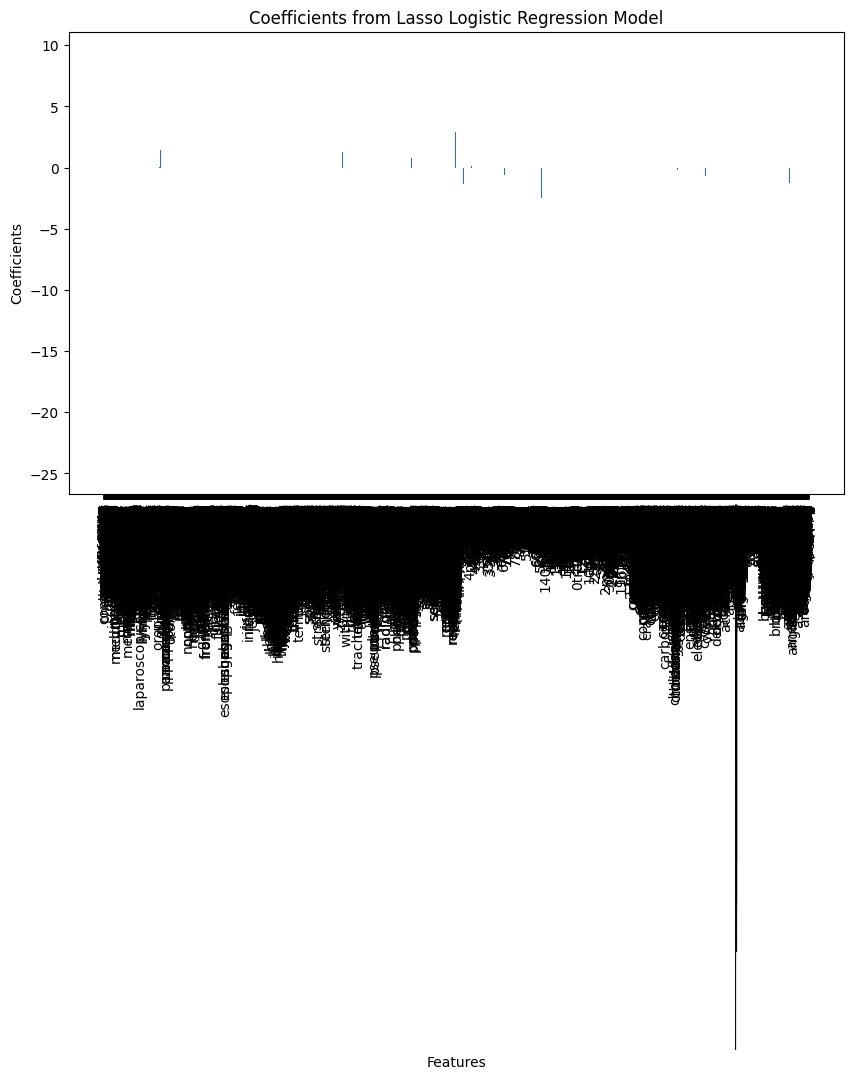

In [155]:
# Plot the coefficients - # for original HTN

plt.figure(figsize=(10, 6))
plt.bar(range(len(coefficients)), coefficients[coef_df.index])
plt.xticks(range(len(coefficients)), coef_df['Feature'].values, rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Coefficients from Lasso Logistic Regression Model')
plt.show()

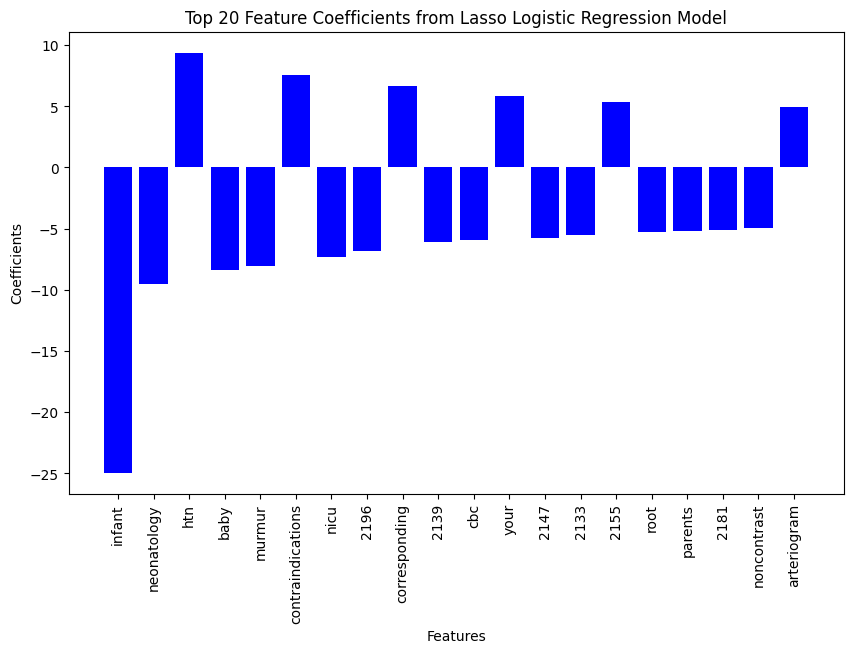

In [156]:
# Plot the coefficients - # for original HTN
# Calculate the absolute values of the coefficients to find the most important ones
coef_df['abs_coefficient'] = np.abs(coef_df['Coefficient'])

# Sort the DataFrame by the absolute value of the coefficients in descending order
coef_df_sorted = coef_df.sort_values(by='abs_coefficient', ascending=False)

# Select the top 20 most important features
top_20 = coef_df_sorted.head(20)

# Plot the coefficients for the top 20 features
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_20)), top_20['Coefficient'], color='blue')
plt.xticks(range(len(top_20)), top_20['Feature'].values, rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Top 20 Feature Coefficients from Lasso Logistic Regression Model')
plt.show()


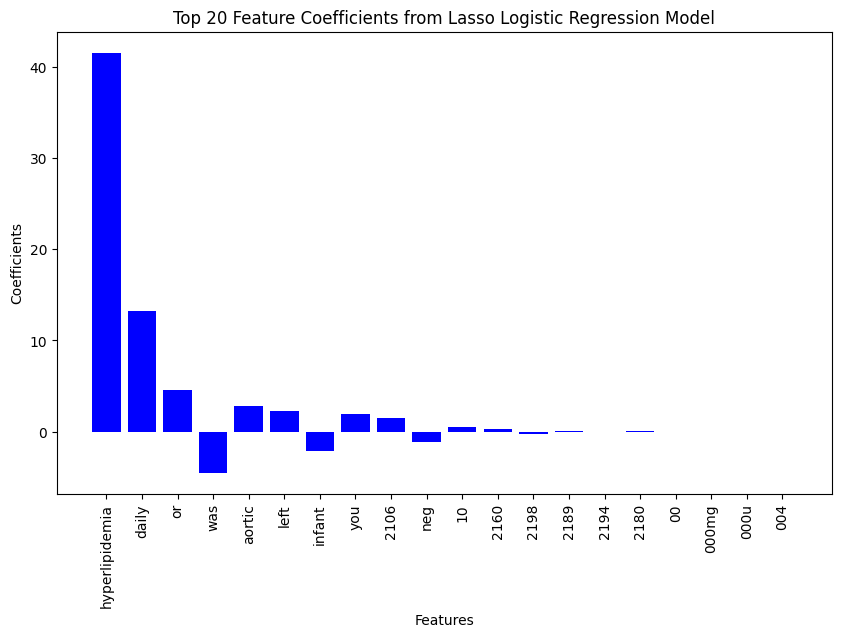

In [282]:
# Plot the coefficients - # for hyperlipidemia 2724
# Calculate the absolute values of the coefficients to find the most important ones
coef_df['abs_coefficient'] = np.abs(coef_df['Coefficient'])

# Sort the DataFrame by the absolute value of the coefficients in descending order
coef_df_sorted = coef_df.sort_values(by='abs_coefficient', ascending=False)

# Select the top 20 most important features
top_20 = coef_df_sorted.head(20)

# Plot the coefficients for the top 20 features
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_20)), top_20['Coefficient'], color='blue')
plt.xticks(range(len(top_20)), top_20['Feature'].values, rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Top 20 Feature Coefficients from Lasso Logistic Regression Model')
plt.show()

In [157]:
# Determine a threshold for predictive words - # for original HTN
threshold = 0.1  # This is an arbitrary threshold, you may adjust it based on the plot

# Get the predictive words for each label based on the threshold
predictive_words_above_threshold = coef_df[coef_df['Coefficient'].abs() > threshold]

print(f"Number of predictive words above threshold: {len(predictive_words_above_threshold)}")

Number of predictive words above threshold: 501


In [283]:
# Determine a threshold for predictive words - # for hyperlipidemia 2724
threshold = 0.1  # This is an arbitrary threshold, you may adjust it based on the plot

# Get the predictive words for each label based on the threshold
predictive_words_above_threshold = coef_df[coef_df['Coefficient'].abs() > threshold]

print(f"Number of predictive words above threshold: {len(predictive_words_above_threshold)}")

Number of predictive words above threshold: 13


In [158]:
print("\nPredictive words for label 1:") # for original HTN
print(predictive_words_above_threshold[predictive_words_above_threshold['Predictive_Label'] == 1])


Predictive words for label 1:
               Feature  Coefficient  Predictive_Label  Label_1_Count  \
2                  htn     9.385972                 1            476   
5    contraindications     7.554815                 1            638   
8        corresponding     6.628851                 1            117   
11                your     5.840912                 1            373   
14                2155     5.326764                 1             61   
..                 ...          ...               ...            ...   
493             family     0.153152                 1            857   
494         meningioma     0.152138                 1             40   
496        radiologist     0.143650                 1             66   
497         diminished     0.141103                 1            168   
499           weakness     0.129171                 1            262   

     Label_0_Count  abs_coefficient  
2              121         9.385972  
5              263         7

In [284]:
print("\nPredictive words for label 1:") # for hyperlipidemia 2724
print(predictive_words_above_threshold[predictive_words_above_threshold['Predictive_Label'] == 1])


Predictive words for label 1:
           Feature  Coefficient  Predictive_Label  Label_1_Count  \
0   hyperlipidemia    41.577597                 1            320   
1            daily    13.246522                 1            471   
2               or     4.558269                 1            499   
4           aortic     2.774843                 1            291   
5             left     2.273197                 1            458   
7              you     1.875889                 1            388   
8             2106     1.483063                 1             26   
10              10     0.526221                 1            493   
11            2160     0.270456                 1             18   

    Label_0_Count  abs_coefficient  
0              31        41.577597  
1             325        13.246522  
2             469         4.558269  
4             148         2.774843  
5             392         2.273197  
7             261         1.875889  
8              12         1.4

In [159]:
print("\nPredictive words for label 0:") # for original HTN
print(predictive_words_above_threshold[predictive_words_above_threshold['Predictive_Label'] == 0])


Predictive words for label 0:
         Feature  Coefficient  Predictive_Label  Label_1_Count  Label_0_Count  \
0         infant   -24.938365                 0              1           1219   
1    neonatology    -9.490757                 0              0            549   
3           baby    -8.344138                 0             23            690   
4         murmur    -8.074908                 0            153            998   
6           nicu    -7.286818                 0              4            905   
..           ...          ...               ...            ...            ...   
488      refills    -0.163197                 0            343            126   
491      variant    -0.155303                 0             62             55   
495  nonspecific    -0.146522                 0            175            136   
498      outside    -0.131363                 0            175            165   
500          fen    -0.102520                 0             32            165 

In [285]:
print("\nPredictive words for label 0:") # for hyperlipidemia 2724
print(predictive_words_above_threshold[predictive_words_above_threshold['Predictive_Label'] == 0])


Predictive words for label 0:
   Feature  Coefficient  Predictive_Label  Label_1_Count  Label_0_Count  \
3      was    -4.515314                 0            498            499   
6   infant    -2.155244                 0              2             42   
9      neg    -1.143652                 0            112            126   
12    2198    -0.219873                 0              8             10   

    abs_coefficient  
3          4.515314  
6          2.155244  
9          1.143652  
12         0.219873  


In [160]:
# Print the predictive words based on the threshold # for original HTN
print("\nPredictive words above threshold:")
print(predictive_words_above_threshold)


Predictive words above threshold:
         Feature  Coefficient  Predictive_Label  Label_1_Count  Label_0_Count  \
0         infant   -24.938365                 0              1           1219   
1    neonatology    -9.490757                 0              0            549   
2            htn     9.385972                 1            476            121   
3           baby    -8.344138                 0             23            690   
4         murmur    -8.074908                 0            153            998   
..           ...          ...               ...            ...            ...   
496  radiologist     0.143650                 1             66             27   
497   diminished     0.141103                 1            168            171   
498      outside    -0.131363                 0            175            165   
499     weakness     0.129171                 1            262            120   
500          fen    -0.102520                 0             32            

In [286]:
# Print the predictive words based on the threshold # for hyperlipidemia 2724
print("\nPredictive words above threshold:")
print(predictive_words_above_threshold)


Predictive words above threshold:
           Feature  Coefficient  Predictive_Label  Label_1_Count  \
0   hyperlipidemia    41.577597                 1            320   
1            daily    13.246522                 1            471   
2               or     4.558269                 1            499   
3              was    -4.515314                 0            498   
4           aortic     2.774843                 1            291   
5             left     2.273197                 1            458   
6           infant    -2.155244                 0              2   
7              you     1.875889                 1            388   
8             2106     1.483063                 1             26   
9              neg    -1.143652                 0            112   
10              10     0.526221                 1            493   
11            2160     0.270456                 1             18   
12            2198    -0.219873                 0              8   

    Label_0_

In [161]:
# Use eli5 to show the weights # for original HTN
explainer = eli5.show_weights(lasso, feature_names=feature_names, top=50)
display(explainer)

In [287]:
# Use eli5 to show the weights # for hyperlipidemia 2724
explainer = eli5.show_weights(lasso, feature_names=feature_names, top=50)
display(explainer)

In [288]:
# Define a threshold for predictive words

threshold = 0.1

In [289]:
# Identify predictive words

predictive_words = [(feature_names[i], coefficients[i]) for i in range(len(coefficients)) if abs(coefficients[i]) > threshold]


In [290]:
# Identify predictive words for label = 1

predictive_words_label_1 = [(feature_names[i], coefficients[i]) for i in range(len(coefficients)) if coefficients[i] > threshold]


In [291]:
# Separate words and their coefficients
predictive_words_label_1_words = [word for word, coef in predictive_words_label_1]


In [292]:
# Separate predictive words into class 0 and class 1
class_0_predictive_words = [word for word, coef in predictive_words if coef < 0]
class_1_predictive_words = [word for word, coef in predictive_words if coef > 0]


In [167]:
# Print the results - for original HTN

print(f"Number of predictive words for class 0: {len(class_0_predictive_words)}")
print(f"Number of predictive words for class 1: {len(class_1_predictive_words)}")
print(f"Predictive words for class 0: {class_0_predictive_words}")
print(f"Predictive words for class 1: {class_1_predictive_words}")

Number of predictive words for class 0: 214
Number of predictive words for class 1: 287
Predictive words for class 0: ['100', '14', '20', '2101', '2103', '2109', '2110', '2119', '2120', '2128', '2133', '2134', '2136', '2139', '2140', '2147', '2151', '2153', '2166', '2170', '2173', '2174', '2179', '2181', '2188', '2196', '30', '33', '42', '46', '49', '57', 'abd', 'abnormality', 'adl', 'after', 'altered', 'amiodarone', 'anterolateral', 'ap', 'are', 'asthma', 'available', 'avr', 'baby', 'be', 'bladder', 'bowel', 'bp', 'breath', 'by', 'c3', 'cbc', 'cc', 'chf', 'chiari', 'circle', 'clinical', 'commode', 'congenital', 'congestive', 'consistent', 'continues', 'convexity', 'cpap', 'ct', 'cuffing', 'date', 'day', 'decreased', 'degree', 'delay', 'depressed', 'depressions', 'desaturation', 'deviation', 'disc', 'discharge', 'dislocation', 'dysphagia', 'easily', 'ecg', 'eeg', 'effect', 'ercp', 'evidence', 'extrasystoles', 'fem', 'female', 'femur', 'fen', 'film', 'flattening', 'foley', 'frontal', 'f

In [293]:
# Print the results - for hyperlipidemia 2724

print(f"Number of predictive words for class 0: {len(class_0_predictive_words)}")
print(f"Number of predictive words for class 1: {len(class_1_predictive_words)}")
print(f"Predictive words for class 0: {class_0_predictive_words}")
print(f"Predictive words for class 1: {class_1_predictive_words}")

Number of predictive words for class 0: 4
Number of predictive words for class 1: 9
Predictive words for class 0: ['2198', 'infant', 'neg', 'was']
Predictive words for class 1: ['10', '2106', '2160', 'aortic', 'daily', 'hyperlipidemia', 'left', 'or', 'you']


In [168]:
# Print the number of predictive words for label 1 - for original HTN
print(f"Number of predictive words for label 1: {len(predictive_words_label_1_words)}")


Number of predictive words for label 1: 287


In [294]:
# Print the number of predictive words for label 1 - for hyperlipidemia 2724
print(f"Number of predictive words for label 1: {len(predictive_words_label_1_words)}")

Number of predictive words for label 1: 9


In [169]:
print(f"Predictive words for label 1: {predictive_words_label_1_words}") # - for original HTN

Predictive words for label 1: ['16', '17', '170', '18', '2102', '2106', '2108', '2112', '2113', '2116', '2117', '2118', '2121', '2122', '2123', '2124', '2132', '2137', '2143', '2154', '2155', '2156', '2157', '2162', '2163', '2164', '2168', '2169', '2171', '2182', '2183', '2189', '2192', '2193', '2195', '22', '2201', '24', '26', '27', '4l', '500cc', '52', '56', '62', 'aaa', 'absent', 'acute', 'adequate', 'admitting', 'amplitude', 'amts', 'anesthesia', 'aneurysm', 'ankle', 'anterior', 'aorta', 'approx', 'arrived', 'arteriogram', 'artifact', 'aspiration', 'assessment', 'at', 'atelectasis', 'basilar', 'beat', 'bilateral', 'bilaterally', 'bleed', 'blood', 'borderline', 'bradycardia', 'breast', 'bundle', 'calcifications', 'calcified', 'call', 'captopril', 'carevue', 'cerebellar', 'cerebral', 'chair', 'change', 'changes', 'checks', 'coiled', 'comfort', 'compared', 'comparison', 'concern', 'consider', 'contraindications', 'controlled', 'corresponding', 'crani', 'craniotomy', 'csru', 'daily', '

In [295]:
print(f"Predictive words for label 1: {predictive_words_label_1_words}") # - for hyperlipidemia 2724

Predictive words for label 1: ['10', '2106', '2160', 'aortic', 'daily', 'hyperlipidemia', 'left', 'or', 'you']


In [296]:
# Identify the top 10 most predictive words for label = 1

top_10_predictive_indices = np.argsort(coefficients)[-10:]  # Get indices of the top 10 coefficients
top_10_predictive_words = [(feature_names[i], coefficients[i]) for i in top_10_predictive_indices]


In [171]:
# Print the top 10 most predictive words for label 1 # - for original HTN

print("Top 10 most predictive words for label 1:")
for word, coef in top_10_predictive_words:
    print(f"{word}: {coef}")

Top 10 most predictive words for label 1:
surgery: 4.502787270299029
nipride: 4.82027497223655
aaa: 4.839804851840538
2154: 4.872270083505217
arteriogram: 4.9042307274226875
2155: 5.326763665255168
your: 5.840912125748218
corresponding: 6.6288505570951894
contraindications: 7.554814754151476
htn: 9.385971773261966


In [297]:
# Print the top 10 most predictive words for label 1 # - for hyperlipidemia 2724

print("Top 10 most predictive words for label 1:")
for word, coef in top_10_predictive_words:
    print(f"{word}: {coef}")

Top 10 most predictive words for label 1:
2189: 0.051941640579035664
2160: 0.27045626461444977
10: 0.526220988364061
2106: 1.4830634754971694
you: 1.8758889550114695
left: 2.2731968860792735
aortic: 2.7748432964606953
or: 4.558268538732424
daily: 13.246521935540299
hyperlipidemia: 41.577597217051675


In [298]:
# but it isn't separating out rows with label 1 so:

# Filter the dataframe to include only rows where label = 1

df_label_1 = df[df['label'] == 1]

In [301]:
# Check which predictive words are present in these filtered rows
# Transform the filtered rows using the same TF-IDF vectorizer

X_label_1 = vectorizer.transform(df_label_1['TEXT'])

In [302]:
# Get the words in these documents

words_in_label_1_docs = np.array(vectorizer.get_feature_names_out())[X_label_1.sum(axis=0).A1 > 0]


In [303]:
# Find the intersection of predictive words and words in the label 1 documents

common_predictive_words = set(predictive_words_label_1_words).intersection(set(words_in_label_1_docs))


In [176]:
# Print the common predictive words # - for original HTN

print(f"Predictive words for label 1 that are present in the documents labeled as 1: {common_predictive_words}")

Predictive words for label 1 that are present in the documents labeled as 1: {'name5', 'sec', 'artifact', 'floor', 'icu', 'pneumothorax', 'wire', 'diffusion', 'sdh', 'elevation', '22', 'left', 'images', 'labetolol', 'absent', 'pericarditis', '2117', '2169', 'checks', 'ectopy', 'calcifications', 'pleural', 'refer', 'contraindications', '4l', 'leak', 'compared', 'stridor', 'he', 'tsicu', '2171', 'gastroparesis', 'preoperative', 'hypertension', 'admitting', 'blood', 'ivp', 'perform', 'pressure', 'read', 'anterior', 'degenerative', 'sda', 'though', 'unchanged', 'anesthesia', 'coiled', '2157', '2123', '2155', 'fs', 'pna', 'transition', '2116', 'vascular', 'expired', '52', 'calcified', 'bradycardia', 'neb', 'tc', 'basilar', 'skin', 'chair', '2102', 'bilateral', 'corresponding', 'evaluate', 'evaluation', '2121', 'lopressor', 'arrived', '2118', 'aaa', 'hypoactive', 'aneurysm', 'fluoro', 'at', 'daily', 'doppler', 'safety', 'process', 'retrocardiac', 'mg', 'significant', 'none', '2163', 'precord

In [304]:
# Print the common predictive words # - for hyperlipidemia 2724

print(f"Predictive words for label 1 that are present in the documents labeled as 1: {common_predictive_words}")

Predictive words for label 1 that are present in the documents labeled as 1: {'hyperlipidemia', 'you', 'left', '10', 'daily', '2106', 'aortic', '2160', 'or'}


In [305]:
# Split the data into train (80%) and remaining (20%)
df_train, df_remaining = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])

# Split the remaining data into validation (10% of total) and test (10% of total)
df_val, df_test = train_test_split(df_remaining, test_size=0.5, random_state=42, stratify=df_remaining['label'])

# Verify the splits
print(f"Training set size: {len(df_train)}")
print(f"Validation set size: {len(df_val)}")
print(f"Test set size: {len(df_test)}")

Training set size: 800
Validation set size: 100
Test set size: 100


In [306]:
train_val = pd.concat([df_train, df_val])

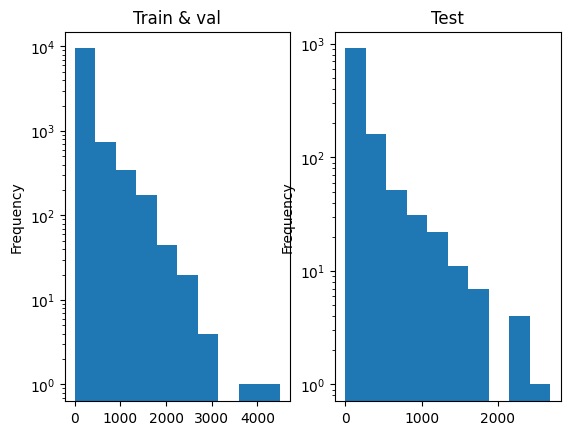

In [179]:
# for original HTN
plt.subplots(1, 2)
plt.subplot(1, 2, 1)
train_val['text'].apply(lambda x: len(x.split())).plot(kind='hist');
plt.yscale('log');
plt.title('Train & val');
plt.subplot(1, 2, 2)
df_test['text'].apply(lambda x: len(x.split())).plot(kind='hist');
plt.yscale('log');
plt.title('Test');

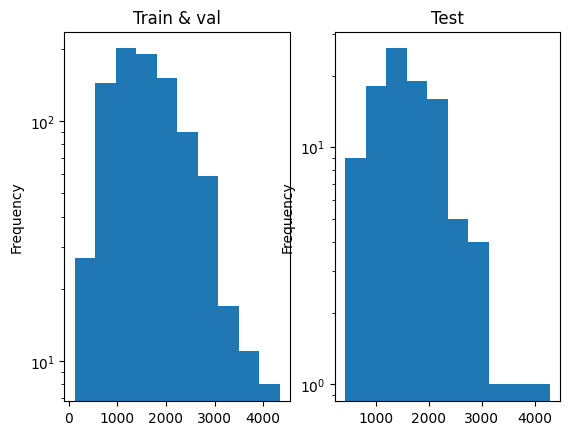

In [309]:
# for HL 2724
plt.subplots(1, 2)
plt.subplot(1, 2, 1)
train_val['TEXT'].apply(lambda x: len(x.split())).plot(kind='hist');
plt.yscale('log');
plt.title('Train & val');
plt.subplot(1, 2, 2)
df_test['TEXT'].apply(lambda x: len(x.split())).plot(kind='hist');
plt.yscale('log');
plt.title('Test');

In [310]:
text_transformer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), lowercase=True, max_features=150000)

In [311]:
%%time
X_train_text = text_transformer.fit_transform(train_val['TEXT'])
X_test_text = text_transformer.transform(df_test['TEXT'])

CPU times: user 5.63 s, sys: 68.2 ms, total: 5.7 s
Wall time: 8.53 s


In [312]:
X_train_text.shape, X_test_text.shape

((900, 150000), (100, 150000))

In [313]:
# logistic regression - try lasso too

logit = LogisticRegression(C=5e1, solver='lbfgs', multi_class='multinomial', random_state=17, n_jobs=4)

cross-validation

In [314]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

In [315]:
%%time
cv_results = cross_val_score(logit, X_train_text, train_val['label'], cv=skf, scoring='f1_micro')

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


CPU times: user 511 ms, sys: 346 ms, total: 857 ms
Wall time: 46.9 s


In [316]:
cv_results, cv_results.mean()

(array([0.73888889, 0.73888889, 0.74444444, 0.73333333, 0.73888889]),
 0.7388888888888889)

In [317]:
%%time
logit.fit(X_train_text, train_val['label'])

CPU times: user 69.5 ms, sys: 15.1 ms, total: 84.6 ms
Wall time: 6.66 s


LogisticRegression(C=50.0, multi_class='multinomial', n_jobs=4, random_state=17)

Try to interpret model weights with ELI5

ELI5 ( Explain like I’m 5) & Permutation Importance

blog: https://medium.com/analytics-vidhya/why-should-i-trust-your-model-bdda6be94c6f

In [189]:
# - for original HTN

eli5.show_weights(estimator=logit,
                  feature_names= list(text_transformer.get_feature_names_out()),
                 top=(50, 5))

In [318]:
# - for HL 2724

eli5.show_weights(estimator=logit,
                  feature_names= list(text_transformer.get_feature_names_out()),
                 top=(50, 5))

https://stats.stackexchange.com/questions/555949/how-to-interpret-the-feature-importances-for-eli5-show-weights-for-regressio

Positive vs Negative feature importances?

Somewhat confusingly, positive results indicate that:

the score got worse when the feature was removed (i.e. score decreased)
therefore the feature has some importance to the accuracy of the model

A negative result means the accuracy actually improved relative to the baseline when the feature was removed. This could occur for various reasons. It is definitely a good idea to remove features with negative feature importances.

There's several points to consider when interpreting results:

the features with the largest (positive) feature importance are definitely the most important features.

features with negative importances are probably confusing your model and should be removed

features close to zero contain little-to-no useful data

however, depending on the nature of your data, it may be that the change in score for even the top-ranked feature is small relative to the baseline. This occurs due to interaction with other features.

This table gives us the weight associated to each feature (same as Logistic regression gives out of box) . The value tells us how much of an impact a feature has on the predictions on average, the sign tells us in which direction.

In [319]:
# Combine the training and validation sets for TF-IDF transformation and model training
combined_df = pd.concat([df_train, df_val])

In [320]:
vectorizer = TfidfVectorizer()
X_combined = vectorizer.fit_transform(combined_df['TEXT'])
y_combined = combined_df['label']

In [321]:
lasso = LogisticRegression(penalty='l1', solver='liblinear')
lasso.fit(X_combined, y_combined)

LogisticRegression(penalty='l1', solver='liblinear')

In [322]:
# Get the feature names (words)

feature_names = vectorizer.get_feature_names_out()

In [194]:
# Use eli5 to show the weights - # - for original HTN

explainer = eli5.show_weights(lasso, feature_names=feature_names, top=50)
display(explainer)

In [323]:
# Use eli5 to show the weights - # - forHL 2724

explainer = eli5.show_weights(lasso, feature_names=feature_names, top=50)
display(explainer)

In [195]:
explainer = eli5.explain_weights(lasso, feature_names=feature_names, top=50) # - for original HTN
print(eli5.format_as_text(explainer))

Explained as: linear model

Features with largest coefficients.
Caveats:
1. Be careful with features which are not
   independent - weights don't show their importance.
2. If scale of input features is different then scale of coefficients
   will also be different, making direct comparison between coefficient values
   incorrect.
3. Depending on regularization, rare features sometimes may have high
   coefficients; this doesn't mean they contribute much to the
   classification result for most examples.

y=1 top features
 Weight  Feature          
-------  -----------------
 +9.387  htn              
 +7.559  contraindications
 +6.616  corresponding    
 +5.840  your             
 +5.329  2155             
 +4.904  arteriogram      
 +4.873  2154             
 +4.841  aaa              
 +4.821  nipride          
 +4.503  surgery          
 +4.478  preoperative     
 +4.235  findings         
 +4.083  evaluate         
 +3.985  calcifications   
 +3.962  radiograph       
 +3.858  posto

In [324]:
explainer = eli5.explain_weights(lasso, feature_names=feature_names, top=50) # - for HL 2724
print(eli5.format_as_text(explainer))

Explained as: linear model

Features with largest coefficients.
Caveats:
1. Be careful with features which are not
   independent - weights don't show their importance.
2. If scale of input features is different then scale of coefficients
   will also be different, making direct comparison between coefficient values
   incorrect.
3. Depending on regularization, rare features sometimes may have high
   coefficients; this doesn't mean they contribute much to the
   classification result for most examples.

y=1 top features
 Weight  Feature       
-------  --------------
+41.578  hyperlipidemia
+13.247  daily         
 +4.560  or            
 +2.775  aortic        
 +2.274  left          
 +1.877  you           
 +1.483  2106          
 +0.527  10            
 +0.271  2160          
 +0.052  2189          
 +0.034  2180          
 -0.044  2194          
 -0.220  2198          
 -0.781  <BIAS>        
 -1.143  neg           
 -2.155  infant        
 -4.513  was           



In [325]:
# Identify the top 10 most predictive words for label = 1

top_10_predictive_indices = np.argsort(lasso.coef_[0])[-10:]  # Get indices of the top 10 coefficients
top_10_predictive_words = [(feature_names[i], lasso.coef_[0][i]) for i in top_10_predictive_indices]


In [197]:
# Print the top 10 most predictive words for label 1 # - for original HTN

print("\nTop 10 most predictive words for label 1:")
for word, coef in top_10_predictive_words:
    print(f"{word}: {coef}")


Top 10 most predictive words for label 1:
surgery: 4.5031230417010395
nipride: 4.820516118852575
aaa: 4.840676391528251
2154: 4.872626063440434
arteriogram: 4.904022801558162
2155: 5.329094779305872
your: 5.840069863853516
corresponding: 6.616314524444158
contraindications: 7.558701115131686
htn: 9.387118284040241


In [326]:
# Print the top 10 most predictive words for label 1 # - for HL 2724

print("\nTop 10 most predictive words for label 1:")
for word, coef in top_10_predictive_words:
    print(f"{word}: {coef}")


Top 10 most predictive words for label 1:
2189: 0.052101261062799324
2160: 0.2705273511920678
10: 0.5271305620623332
2106: 1.483086464811379
you: 1.87664163973286
left: 2.2737533616649777
aortic: 2.774950930877784
or: 4.560103515249054
daily: 13.247487919447533
hyperlipidemia: 41.577676507185565


In [327]:
# Identify the top 10 most predictive words for label = 0

bottom_10_predictive_indices = np.argsort(lasso.coef_[0])[:10]  # Get indices of the bottom 10 coefficients
bottom_10_predictive_words = [(feature_names[i], lasso.coef_[0][i]) for i in bottom_10_predictive_indices]


In [199]:
# Print the top 10 most predictive words for label 0 # - for original HTN

print("\nTop 10 most predictive words for label 0:")
for word, coef in bottom_10_predictive_words:
    print(f"{word}: {coef}")


Top 10 most predictive words for label 0:
infant: -24.935602741077396
neonatology: -9.490093308219995
baby: -8.34311122192479
murmur: -8.071698637086184
nicu: -7.284931014719061
2196: -6.80964573325637
2139: -6.053255791695592
cbc: -5.933464819297392
2147: -5.8022173773727586
2133: -5.5322647306628685


In [328]:
# Print the top 10 most predictive words for label 0 # - for HL 2724

print("\nTop 10 most predictive words for label 0:")
for word, coef in bottom_10_predictive_words:
    print(f"{word}: {coef}")


Top 10 most predictive words for label 0:
was: -4.513213469739007
infant: -2.154798731594967
neg: -1.1429317217933754
2198: -0.21980413539156032
2194: -0.04442388364714233
multipple: 0.0
multiples: 0.0
multiple: 0.0
multiplanar: 0.0
mumurs: 0.0


In [329]:
# Count the number of predictive words for each label

threshold = 0.1  # Define a threshold for predictive words
predictive_words_label_1 = [(feature_names[i], lasso.coef_[0][i]) for i in range(len(lasso.coef_[0])) if lasso.coef_[0][i] > threshold]
predictive_words_label_0 = [(feature_names[i], lasso.coef_[0][i]) for i in range(len(lasso.coef_[0])) if lasso.coef_[0][i] < -threshold]


In [201]:

# - for original HTN

print(f"\nNumber of predictive words for label 1: {len(predictive_words_label_1)}")
print(f"Number of predictive words for label 0: {len(predictive_words_label_0)}")



Number of predictive words for label 1: 287
Number of predictive words for label 0: 215


In [330]:
# - for HL 2724

print(f"\nNumber of predictive words for label 1: {len(predictive_words_label_1)}")
print(f"Number of predictive words for label 0: {len(predictive_words_label_0)}")


Number of predictive words for label 1: 9
Number of predictive words for label 0: 4


In [202]:
# Print the predictive words for label 1 and label 0 # - for original HTN

print("\nPredictive words for label 1:")
for word, coef in predictive_words_label_1:
    print(f"{word}: {coef}")


Predictive words for label 1:
16: 0.24360958875197986
17: 0.5299816062500825
170: 0.3412441137256176
18: 0.7932488612120677
2102: 0.8830632036214001
2106: 2.1646618030428426
2108: 2.956017042733206
2112: 1.5273640826587043
2113: 2.000916260531198
2116: 0.2672351827527554
2117: 0.35927696832266276
2118: 3.051302567036159
2121: 1.1713876990034038
2122: 2.9312369496799375
2123: 3.2831213270691726
2124: 1.5178364945716383
2132: 0.7255048020948723
2137: 1.4804673751892143
2143: 1.102168604149733
2154: 4.872626063440434
2155: 5.329094779305872
2156: 3.5747213183863136
2157: 1.4542139425390461
2162: 2.422326047985447
2163: 2.7814605715794305
2164: 0.32318723192988114
2168: 1.4484097746593545
2169: 3.3554693857542803
2171: 0.21291456337729428
2182: 0.7837688073849861
2183: 0.8924934294317296
2189: 2.843896573657362
2192: 1.3125176872594877
2193: 2.497680969403426
2195: 0.155172329301905
22: 0.7883735808785757
2201: 1.4390716027565673
24: 0.9705650480935253
26: 2.5884167456236113
27: 1.0238198

In [331]:
# Print the predictive words for label 1 and label 0 # - for HL 2724

print("\nPredictive words for label 1:")
for word, coef in predictive_words_label_1:
    print(f"{word}: {coef}")


Predictive words for label 1:
10: 0.5271305620623332
2106: 1.483086464811379
2160: 0.2705273511920678
aortic: 2.774950930877784
daily: 13.247487919447533
hyperlipidemia: 41.577676507185565
left: 2.2737533616649777
or: 4.560103515249054
you: 1.87664163973286


In [203]:
print("\nPredictive words for label 0:") # - for original HTN
for word, coef in predictive_words_label_0:
    print(f"{word}: {coef}")


Predictive words for label 0:
100: -3.551110155369308
14: -0.8208708829283244
20: -0.23518418975938302
2101: -2.8906770527820416
2103: -1.8655869451265246
2109: -0.19156876024782415
2110: -0.9258100649321143
2119: -1.773106229786129
2120: -2.072795283515396
2128: -4.877362497365424
2133: -5.5322647306628685
2134: -1.773567127697191
2136: -3.3026321109781125
2139: -6.053255791695592
2140: -3.8092971759208223
2147: -5.8022173773727586
2151: -0.8583262715548837
2153: -1.734332634856803
2166: -0.5831249755128007
2170: -0.6212984106330957
2173: -2.8978033761616158
2174: -1.2282562681938465
2179: -0.3349204263368181
2181: -5.101107849070164
2188: -1.5392853771385313
2196: -6.80964573325637
30: -1.246280493447591
33: -0.9849464079854839
42: -0.9323791440688343
46: -2.3008868271591862
49: -1.0879123752576227
57: -3.5189338028725072
abd: -1.4879181192668303
abnormality: -0.2895267017540993
adl: -0.2087929240415846
after: -1.0795008684129916
altered: -1.1954524463516134
amiodarone: -0.198593078

In [332]:
print("\nPredictive words for label 0:") # - for HL 2724
for word, coef in predictive_words_label_0:
    print(f"{word}: {coef}")


Predictive words for label 0:
2198: -0.21980413539156032
infant: -2.154798731594967
neg: -1.1429317217933754
was: -4.513213469739007


In [333]:
# Use eli5 to show the weights

explainer_pos = eli5.explain_weights(lasso, feature_names=feature_names, top=50)


In [334]:
# Identify the top 50 most predictive words for label = 0 (negative coefficients)

top_negative_indices = np.argsort(lasso.coef_[0])[:50]
top_negative_words = [(feature_names[i], lasso.coef_[0][i]) for i in top_negative_indices]


In [335]:
# Create a new list of FeatureWeight objects for the negative coefficients

from eli5.base import FeatureWeight, FeatureWeights

In [336]:
negative_weights = [FeatureWeight(feature=word, weight=coef) for word, coef in top_negative_words]

In [208]:
# Use eli5 to show the weights for positive coefficients (label=1) # - for original HTN
explainer_pos = eli5.show_weights(lasso, feature_names=feature_names, top=50)
display(explainer_pos)

In [337]:
# Use eli5 to show the weights for positive coefficients (label=1) # - for HL 2724
explainer_pos = eli5.show_weights(lasso, feature_names=feature_names, top=50)
display(explainer_pos)

In [338]:
# Identify the top 50 most predictive words for label=0 (negative coefficients)
top_negative_indices = np.argsort(lasso.coef_[0])[:50]
top_negative_words = [(feature_names[i], lasso.coef_[0][i]) for i in top_negative_indices]


In [339]:
# Create a new list of FeatureWeight objects for the negative coefficients
from eli5.base import FeatureWeight, FeatureWeights
negative_weights = [FeatureWeight(feature=word, weight=coef) for word, coef in top_negative_words]


In [340]:
#Use eli5.show_prediction for a specific instance
# Choose an example document from the test set
example_index = 0  # Change this to the index of the document you want to analyze
example_text = df_test['text'].iloc[example_index]

KeyError: 'text'

In [212]:
# Use eli5 to show the prediction # - for original HTN
prediction_explainer = eli5.show_prediction(lasso, doc=example_text, vec=vectorizer, target_names=['No Hypertension', 'Hypertension'])
display(prediction_explainer)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [341]:
# Use eli5 to show the prediction # - for HL 2724
prediction_explainer = eli5.show_prediction(lasso, doc=example_text, vec=vectorizer, target_names=['No Hypertension', 'Hypertension'])
display(prediction_explainer)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


contribution indicates contribution to prediction

"< BIAS >" indicates the intercept term of the logistic regression model

intercept (also known as the bias term) is a constant added to the linear combination of features. It allows the decision boundary of the classifier to be shifted and does not depend on any input feature.

intercept helps in determining the baseline prediction when all feature values are zero. It acts as an initial value to which the contributions of individual features (words, in this case) are added.

In the eli5.show_prediction output, < BIAS > indicates the starting point of the log-odds for the prediction before considering the contribution of any specific feature. If the bias is positive, it generally means there's a baseline inclination towards predicting the positive class. Conversely, if it's negative, the baseline inclination is towards predicting the negative class.

In [213]:
# - for original HTN

example_transformed = vectorizer.transform([example_text])
prediction_explainer = eli5.show_prediction(lasso, doc=example_text, vec=vectorizer, target_names=['No Hypertension', 'Hypertension'])
display(prediction_explainer)



/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [342]:
# - for HL 2724

example_transformed = vectorizer.transform([example_text])
prediction_explainer = eli5.show_prediction(lasso, doc=example_text, vec=vectorizer, target_names=['No Hypertension', 'Hypertension'])
display(prediction_explainer)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [214]:
df.head()

Unnamed: 0  subject_id icd9_code gender                  dob  \
0           0        1738      4019      F  2090-12-20 00:00:00   
1           1       23055      4019      F  2044-10-15 00:00:00   
2           2       21457      4019      F  2059-06-19 00:00:00   
3           3        1048      4019      M  2116-04-12 00:00:00   
4           4       18041      4019      M  2133-06-05 00:00:00   

                ethnicity                                               text  \
0                   WHITE  CONDITION UPDATE\nD: PLEASE SEE CAREVUE FOR SP...   
1   UNKNOWN/NOT SPECIFIED  MSICU NSG ADMIT NOTE 1400-1900\n\n60 YO woman ...   
2  BLACK/AFRICAN AMERICAN  [**2121-7-5**] 5:18 PM\n TOE(S), 2+ VIEW RIGHT...   
3                   WHITE  Sinus rhythm. Left atrial abnormality. Promine...   
4                   WHITE  [**2196-8-1**] 7:07 PM\n CTA CHEST W&W/O C &RE...   

   no_of_docs  label  predicted  
0          48      1          0  
1          50      1          0  
2          41      1          1  
3          18      1          1  
4          42      1          0

In [215]:
# Find indices where the Label is 0
indices = df.index[df['label'] == 0].tolist()

print("Indices where Label is 0:", indices)

Indices where Label is 0: [6000, 6001, 6002, 6003, 6004, 6005, 6006, 6007, 6008, 6009, 6010, 6011, 6012, 6013, 6014, 6015, 6016, 6017, 6018, 6019, 6020, 6021, 6022, 6023, 6024, 6025, 6026, 6027, 6028, 6029, 6030, 6031, 6032, 6033, 6034, 6035, 6036, 6037, 6038, 6039, 6040, 6041, 6042, 6043, 6044, 6045, 6046, 6047, 6048, 6049, 6050, 6051, 6052, 6053, 6054, 6055, 6056, 6057, 6058, 6059, 6060, 6061, 6062, 6063, 6064, 6065, 6066, 6067, 6068, 6069, 6070, 6071, 6072, 6073, 6074, 6075, 6076, 6077, 6078, 6079, 6080, 6081, 6082, 6083, 6084, 6085, 6086, 6087, 6088, 6089, 6090, 6091, 6092, 6093, 6094, 6095, 6096, 6097, 6098, 6099, 6100, 6101, 6102, 6103, 6104, 6105, 6106, 6107, 6108, 6109, 6110, 6111, 6112, 6113, 6114, 6115, 6116, 6117, 6118, 6119, 6120, 6121, 6122, 6123, 6124, 6125, 6126, 6127, 6128, 6129, 6130, 6131, 6132, 6133, 6134, 6135, 6136, 6137, 6138, 6139, 6140, 6141, 6142, 6143, 6144, 6145, 6146, 6147, 6148, 6149, 6150, 6151, 6152, 6153, 6154, 6155, 6156, 6157, 6158, 6159, 6160, 6161, 6

In [216]:
df['label'][6011]

0

In [217]:
print(len(df))

12000


In [218]:
index_to_access = 6011

try:
    value = df['text'].iloc[index_to_access]
    print(value)
except IndexError:
    print(f"Index {index_to_access} is out of bounds.")

[**2118-8-18**] 2:17 AM
 CT HEAD W/O CONTRAST                                            Clip # [**Clip Number (Radiology) 70687**]
 Reason: ich, fx
 ______________________________________________________________________________
 [**Hospital 4**] MEDICAL CONDITION:
  19 year old man s/p assault with screwdriver to head.
 REASON FOR THIS EXAMINATION:
  ich, fx
 No contraindications for IV contrast
 ______________________________________________________________________________
 WET READ: ICAb [**Doctor First Name 38**] [**2118-8-18**] 3:50 AM
  no fractures or intracraneal hemorrhage
 ______________________________________________________________________________
                                 FINAL REPORT
 INDICATION: Assault, head trauma.

 TECHNIQUE: Axial images of the brain were obtained without IV contrast.

 FINDINGS: The ventricles, cisterns and sulci are normal. There is no shift of
 normal midline structures or mass effect. The [**Doctor Last Name 181**]/white matter
 differen

In [219]:
# - for original HTN
# Choose an example document that has label 0
example_index = 6011  # Change this to the index of the document you want to analyze
example_text = df['text'].iloc[example_index]

# Use eli5 to show the prediction with actual words
prediction_explainer = eli5.show_prediction(lasso, doc=example_text, vec=vectorizer, target_names=['No Hypertension', 'Hypertension'])
display(prediction_explainer)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [220]:
# - for original HTN
# Choose an example document that has label 1
example_index = 4568 # Change this to the index of the document you want to analyze
example_text = df['text'].iloc[example_index]

# Use eli5 to show the prediction with actual words
prediction_explainer = eli5.show_prediction(lasso, doc=example_text, vec=vectorizer, target_names=['No Hypertension', 'Hypertension'])
display(prediction_explainer)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [221]:
# - for original HTN
# Use eli5 to show the prediction with actual words
example_transformed = vectorizer.transform([example_text])
prediction_explainer = eli5.show_prediction(lasso, doc=example_text, vec=vectorizer, target_names=['No Hypertension', 'Hypertension'])
display(prediction_explainer)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


https://github.com/mayur29/Machine-Learning-Model-Interpretation/blob/master/ELI5%20Model%20Interpretation.ipynb

In [ ]:
df.head()

Unnamed: 0  subject_id icd9_code gender                  dob  \
0           0        1738      4019      F  2090-12-20 00:00:00   
1           1       23055      4019      F  2044-10-15 00:00:00   
2           2       21457      4019      F  2059-06-19 00:00:00   
3           3        1048      4019      M  2116-04-12 00:00:00   
4           4       18041      4019      M  2133-06-05 00:00:00   

                ethnicity                                               text  \
0                   WHITE  CONDITION UPDATE\nD: PLEASE SEE CAREVUE FOR SP...   
1   UNKNOWN/NOT SPECIFIED  MSICU NSG ADMIT NOTE 1400-1900\n\n60 YO woman ...   
2  BLACK/AFRICAN AMERICAN  [**2121-7-5**] 5:18 PM\n TOE(S), 2+ VIEW RIGHT...   
3                   WHITE  Sinus rhythm. Left atrial abnormality. Promine...   
4                   WHITE  [**2196-8-1**] 7:07 PM\n CTA CHEST W&W/O C &RE...   

   no_of_docs  label  
0          48      1  
1          50      1  
2          41      1  
3          18      1  
4          42      1

In [222]:
df.label.value_counts()

label
1    6000
0    6000
Name: count, dtype: int64

In [223]:
# Get the feature matrix (X) and the target vector (y)

y = df["label"].map({"0": 0, "1": 1})
X = df.drop("label", axis=1)

In [224]:
X.dtypes

Unnamed: 0     int64
subject_id     int64
icd9_code     object
gender        object
dob           object
ethnicity     object
text          object
no_of_docs     int64
predicted      int64
dtype: object

In [225]:
# Logistic Regression
lr_model = LogisticRegression(class_weight="balanced", solver="liblinear", random_state=42)

In [226]:
# Use eli5.show_prediction for a specific instance
# Choose an example document from the test set
example_index = 0  # Change this to the index of the document you want to analyze
example_text = df_test['text'].iloc[example_index]

In [227]:
# Transform the example text using the same TF-IDF vectorizer
example_transformed = vectorizer.transform([example_text])

try after splitting into words

In [228]:
# Split the data into train (80%) and remaining (20%)
df_train, df_remaining = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])

# Split the remaining data into validation (10% of total) and test (10% of total)
df_val, df_test = train_test_split(df_remaining, test_size=0.5, random_state=42, stratify=df_remaining['label'])


In [229]:
# Verify the splits
print(f"Training set size: {len(df_train)}")
print(f"Validation set size: {len(df_val)}")
print(f"Test set size: {len(df_test)}")

Training set size: 9600
Validation set size: 1200
Test set size: 1200


In [230]:
# Combine the training and validation sets for transformation and model training
combined_df = pd.concat([df_train, df_val])

In [231]:
from sklearn.feature_extraction.text import CountVectorizer
# Split text into words and vectorize using CountVectorizer
vectorizer = CountVectorizer()
X_combined = vectorizer.fit_transform(combined_df['text'])
y_combined = combined_df['label']

In [232]:
# Logistic Lasso Regression on the combined training and validation data
lasso = LogisticRegression(penalty='l1', solver='liblinear')
lasso.fit(X_combined, y_combined)

LogisticRegression(penalty='l1', solver='liblinear')

In [233]:
# Get the feature names (words) and coefficients
feature_names = vectorizer.get_feature_names_out()
coefficients = lasso.coef_[0]

In [234]:
# Create a DataFrame for the coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

In [235]:
# Add a column indicating if the feature is predictive of label 1 or 0 based on the coefficient's sign
coef_df['Predictive_Label'] = np.where(coef_df['Coefficient'] > 0, 1, 0)

# Sort the DataFrame by the absolute value of the coefficients in descending order
coef_df = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)


In [236]:
coef_df.head()

Feature  Coefficient  Predictive_Label
13035     cataract     4.564404                 1
20381       infant    -4.068791                 0
22012     lowering    -3.702538                 0
23583  neonatology    -3.182417                 0
1252          1315    -3.149395                 0

In [237]:
# Map the coefficients back to the original labels
# This involves associating each word in the feature set with the documents and their labels
X_original = vectorizer.transform(df['text'])
df['predicted'] = lasso.predict(X_original)

In [238]:
# For each feature, determine the original label distribution
feature_label_dist = []
for feature in feature_names:
    indices = np.where(X_original[:, vectorizer.vocabulary_[feature]].toarray().flatten() > 0)[0]
    original_labels = df.iloc[indices]['label'].values
    label_1_count = np.sum(original_labels == 1)
    label_0_count = np.sum(original_labels == 0)
    feature_label_dist.append((feature, label_1_count, label_0_count))

In [239]:
# Create a DataFrame to store this information
feature_label_df = pd.DataFrame(feature_label_dist, columns=['Feature', 'Label_1_Count', 'Label_0_Count'])

# Merge this with the coef_df
coef_df = coef_df.merge(feature_label_df, on='Feature')

In [240]:
coef_df.head()

Feature  Coefficient  Predictive_Label  Label_1_Count  Label_0_Count
0     cataract     4.564404                 1             46              9
1       infant    -4.068791                 0              1           1219
2     lowering    -3.702538                 0              2              6
3  neonatology    -3.182417                 0              0            549
4         1315    -3.149395                 0              4             10

In [241]:
# Use eli5 to show the weights # for original HTN
explainer = eli5.show_weights(lasso, feature_names=feature_names, top=50)
display(explainer)

In [242]:
# Determine a threshold for predictive words
threshold = 0.1  # This is an arbitrary threshold, you may adjust it based on the plot

# Get the predictive words for each label based on the threshold
predictive_words_above_threshold = coef_df[coef_df['Coefficient'].abs() > threshold]


In [243]:
# Save predictive words into DataFrames
predictive_words_label_1 = predictive_words_above_threshold[predictive_words_above_threshold['Predictive_Label'] == 1]
predictive_words_label_0 = predictive_words_above_threshold[predictive_words_above_threshold['Predictive_Label'] == 0]


In [244]:
# Print the results  # for original HTN
print(f"Number of predictive words above threshold: {len(predictive_words_above_threshold)}")

print("\nPredictive words for label 1:")
print(predictive_words_label_1)

print("\nPredictive words for label 0:")
print(predictive_words_label_0)

# Print the predictive words based on the threshold
print("\nPredictive words above threshold:")
print(predictive_words_above_threshold)

Number of predictive words above threshold: 1825

Predictive words for label 1:
            Feature  Coefficient  Predictive_Label  Label_1_Count  \
0          cataract     4.564404                 1             46   
7               aaa     2.682841                 1             38   
13          rhonchi     2.500602                 1             90   
15       collateral     2.393664                 1             21   
16             2155     2.327169                 1             61   
...             ...          ...               ...            ...   
1819      hospital1     0.100744                 1            734   
1821            250     0.100472                 1            120   
1822            hcp     0.100457                 1             34   
1823           2143     0.100227                 1             49   
1824  cholangiogram     0.100217                 1              9   

      Label_0_Count  
0                 9  
7                 0  
13               19  
15 

In [245]:
predictive_words_above_threshold

Feature  Coefficient  Predictive_Label  Label_1_Count  \
0          cataract     4.564404                 1             46   
1            infant    -4.068791                 0              1   
2          lowering    -3.702538                 0              2   
3       neonatology    -3.182417                 0              0   
4              1315    -3.149395                 0              4   
...             ...          ...               ...            ...   
1820    dimensional    -0.100630                 0             48   
1821            250     0.100472                 1            120   
1822            hcp     0.100457                 1             34   
1823           2143     0.100227                 1             49   
1824  cholangiogram     0.100217                 1              9   

      Label_0_Count  
0                 9  
1              1219  
2                 6  
3               549  
4                10  
...             ...  
1820             33  
1821             81  
1822             16  
1823             26  
1824              2  

[1825 rows x 5 columns]

In [246]:
# Save predictive words into DataFrames
predictive_words_label_1 = predictive_words_above_threshold[predictive_words_above_threshold['Predictive_Label'] == 1]
predictive_words_label_0 = predictive_words_above_threshold[predictive_words_above_threshold['Predictive_Label'] == 0]

# Save to CSV or any other format you prefer
predictive_words_label_1.to_csv(sample_size_dir+'/data_jaya/original_predictive_words_label_1.csv', index=False)
predictive_words_label_0.to_csv(sample_size_dir+'/data_jaya/original_predictive_words_label_0.csv', index=False)
